# Contents :
* [Summary](#first-bullet)
    * [Best Models](#second-bullet)
    * [Data Exploration](#exploration)
    * [Data Preparation](#prep)
    * [Data Modelling](#model)
    * [Conclusion](#conclusion)
    
* [Part 1 - Preparing the Data - Calculating Features and Setting up the DataFrame](#part1)

* [Part 2 - Data Modelling](#modelling)
    *	[Clean up the final dataframe we'll use for modelling](#cleanup) 
    *	[Define X and y](#define)
    *	[Chi-Square Test to identify the significant variables](#chisq)
    *	[Correlations between features and target](#corr)
    *	[Forward Feature Selection](#ffs)
    *	[Backward Feature Elimination](#bfe)
    *	[Random Forests Feature Selection](#rfselect)
    *	[Random Forests Hyperparameter Tuning](#tune)
    *	[Take all the lists of best features and find the common elements](#bestlist)
    *	[Apply VIF to the elements that appear in at least 3 lists](#vif)
    *	[Manually selecting features for logistic regression, by looping through the list of features and selecting only the ones that increase accuracy](#manual)
    *	[Logistic regression with various feature sets](#logreg)
    *	[Stacking Models](#stacking)
    *	[Bagging](#bagging)
    *	[Ridge Regression with all features](#ridge)
    *	[Functions for building and evaluating individual models](#functions)
    *	[(Bagged) Logistic Regression over 50 runs with ROC](#baggedlog)
    *	[Ridge regression over 50 runs - simple and bagged](#baggedridge)
    *	[AdaBoost Classfier over 50 runs simple and bagged](#adaboost)
    *	[Random Forests over 50 runs - simple and bagged](#adaboost)




## Summary <a class="anchor" id="first-bullet"></a>

### Introduction

Throughout this project, we will try to predict donor giving for a non-profit organization.

The data is based on a subset of real data that has been anonymized. In includes chronological donation data that covers 5 years, with information about donor id, date, amount donated, corresponding campaign and appeal name.

Based on this information, we calculated several indicators per donor and used them to create a predictive model that will predict if the donor gives or not the next year.

The dataset includes the years 2015-2019, so we'll use the years 2015-2018 as training data and "gave2019" will be our target. However, the years will be automatically updated when uploading new data.

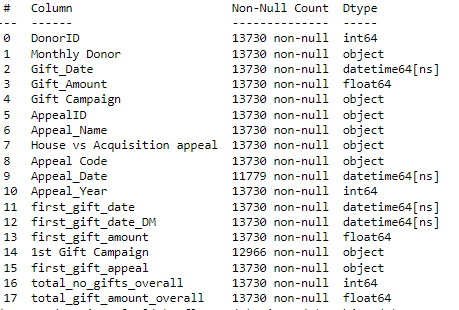

### Best Models <a class="anchor" id="second-bullet"></a>

| |Logistic Regression|Random Forests|Ridge Regression|Bagged AdaBoost Classifier|
|:----|:----|:----|:----|:----|
|<b>Features</b>|1.       median_days_btw_gifts_bins_(0.0, 400.0]|1.       intermediary_status_2018_Inactive|1.       days_since_last_gift|1.       days_since_last_gift|
| |2.       final_status_no_2016|2.       days_since_last_gift|2.       total_gifts|2.       median_days_btw_gifts_bins_(0.0, 400.0]|
| |3.       final_status_2017_Inactive|3.       segment_number|3.       median_days_btw_gifts_bins_(0.0 400.0]|3.       final_status_2018_Renewed Donor|
| |4.       gave2018|4.       final_status_2018_Renewed Donor|4.       no_of_gifts|4.       no_gifts_bins_2018_(3.0, 9.0]|
| |5.       days_since_first_gift|5.       intermediary_status_2017_Active|5.       no_gifts_2018|5.       no_of_gifts_bins_(7, 29]|
| |6.       no_gifts_2018|6.       median_days_btw_gifts|6.       no_years_since_acq| |
| |7.       days_since_last_gift|7.       cum_amt_rank_2017|7.       final_status_2018_Renewed Donor| |
| | |8.       no_of_gifts_bins_(3 7]|8.       no_gifts_2017| |
| | | |9.       final_status_2017_Renewed Donor| |
| | | |10.    donor_upgrade_2018_Gave the Same| |
| | | |11.    no_gifts_2016| |
| | | |12.    cum_amt_categ_2018_(50 100]| |
| | | |13.    cum_amt_categ_2018_(250 1000]| |
| | | |14.    no_years_since_acq_bins_(10 24]| |
| | | |15.    final_status_2017_Not yet acquired,| |
|<b>Accuracy</b>|Average accuracy: 0.78|Average accuracy: 0.78|Average accuracy: 0.78|Average accuracy: 0.78|
| |Average S.D of accuracy: 0.01|Average S.D of accuracy: 0.01|Average S.D of accuracy: 0.01|Average S.D of accuracy: 0.01|
| | | | | |
|<b>Precision</b>|Average precision: 0.7|Average precision: 0.7|Average precision: 0.7|Average precision: 0.7|
| |Average S.D of precision: 0.02|Average S.D of precision: 0.02|Average S.D of precision: 0.02|Average S.D of precision: 0.02|
| | | | | |
|<b>Recall</b> |Average recall: 0.69|Average recall: 0.7|Average recall: 0.69|Average recall: 0.7|
| |Average S.D of recall: 0.03|Average S.D of recall: 0.02|Average S.D of recall: 0.02|Average S.D of recall: 0.02|
| | | | | |
|<b>F1</b>|Average F1: 0.69|Average F1: 0.7|Average F1: 0.7|Average F1: 0.7|
| |Average S.D of F1: 0.02|Average S.D of F1: 0.02|Average S.D of F1: 0.02|Average S.D of F1: 0.02|
| | | | | |
|<b>ROC AUC</b>|0.85|0.85| |0.85|
|<b>Methodology</b>|The averages are calculated over 50 runs.|The averages are calculated over 50 runs.|The averages are calculated over 50 runs.|The averages are calculated over 50 runs.|
| | |Here are the stacked models:| | |
| | |·        LogisticRegression| | |
| | |·        DecisionTreeClassifier| | |
| | |·        ExtraTreesClassifier| | |
| | |·        AdaBoostClassifier| | |
| | |·        RidgeClassifier| | |
| | |·        RandomForestClassifier| | |



### Data Exploration <a class="anchor" id="exploration"></a>


In order to create features for the model, we first grouped the data by donor and generated different summarized indicators: average gift, total amount given, median gift, minimum and maximum gifts, number of gifts. 

#### Number of gifts given
If we look at the total number of gifts given by a donor during his lifetime, we can see an important difference between donors who gave 1 gift vs 2, 3 and 4. Afterwards, the percentage of donors who gave in 2019 tends to stabilize, while the number of donors in each category becomes smaller.

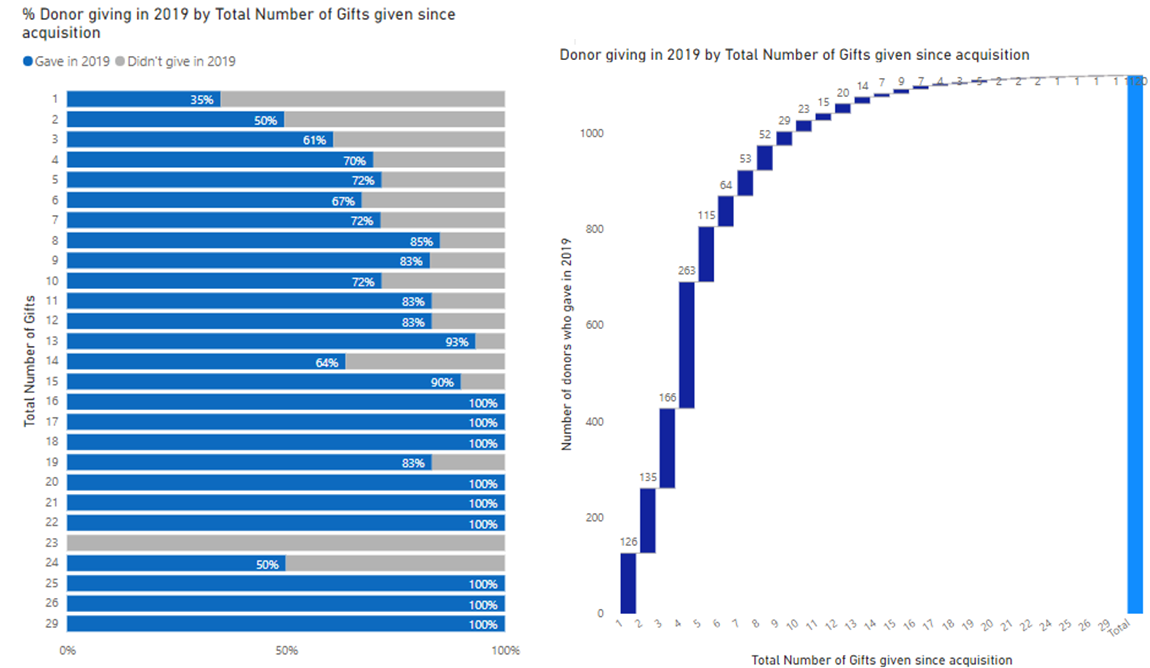


The same phenomenon is observed if we focus only on the previous year – there is an obvious % increase of donors who gave in 2019 if they previously gave in 2018  1 to 2,3,4 or 5 gifts:
 
 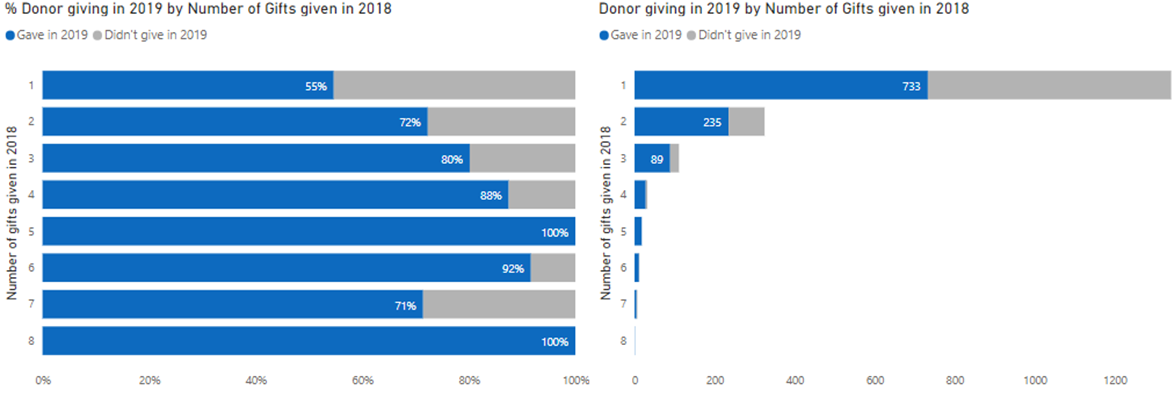

An important note is that consistenly over the years, approx. 70% of donors only give 1 gift per year and around 17 – 20% give 2 gifts. The rest of the donors (about 10%) give 3+ gifts per year. So while we have a correlation between giving in 2019 and the number of gifts given during previous years, it applies to a small subset of the donros.

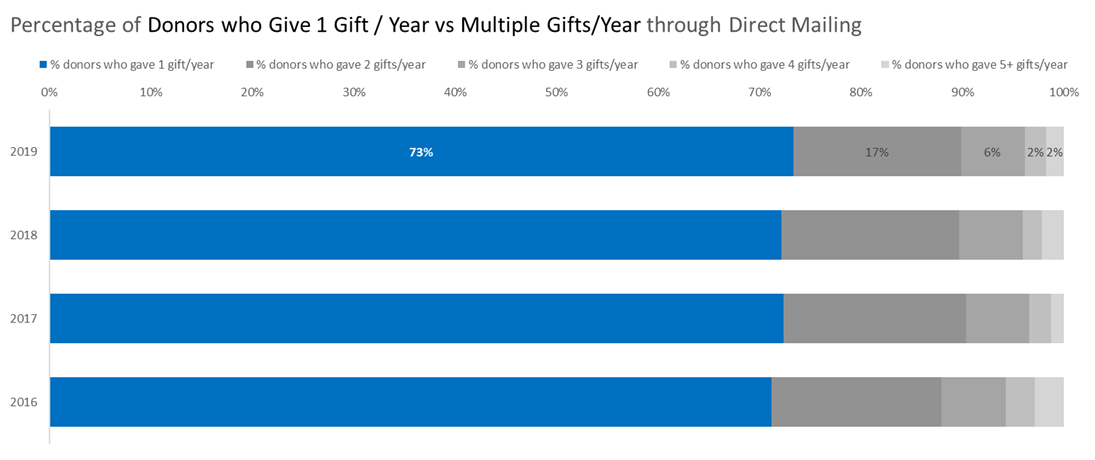
 

#### Number of years since acquisition
There also seems to be a correlation between the number of years since acquisition and the tendency to give in subsequent years. As the percentage of each category increases though, the number of donors per category decreases.
 
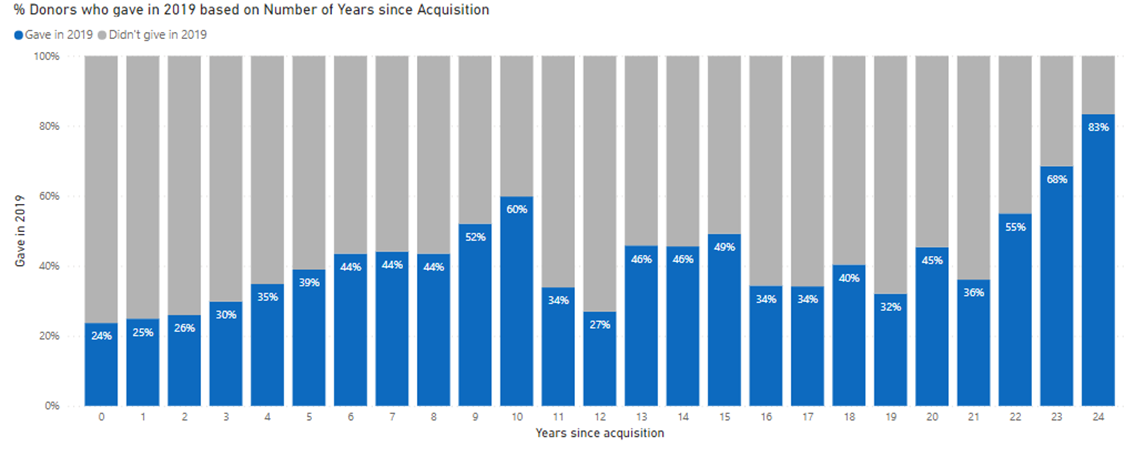

#### Number of days since last gift
As expected, recency is an important factor in giving. Most donations received in 2019 come from donors who gave recently (within the last year). A known trend in giving is that approximatively 70% of donations per year come from renewed donors.

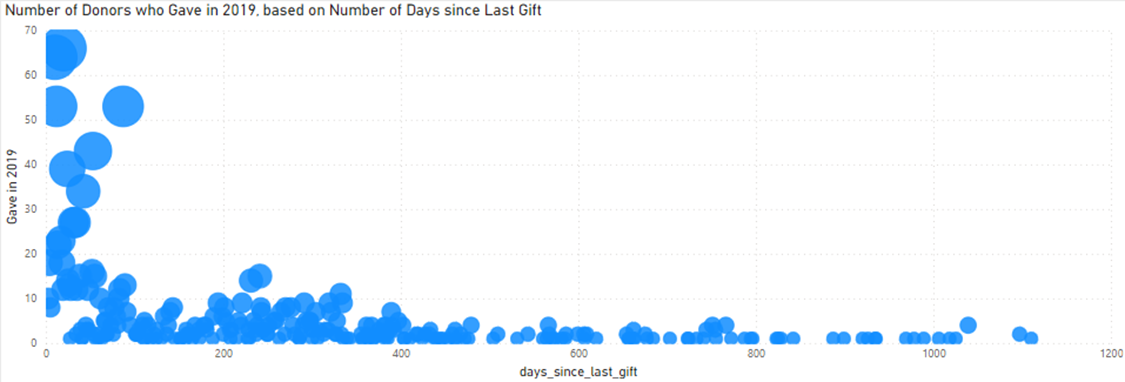

#### Average number of days between gifts
As we saw earlier, most donors give only 1 gift per year, so the average number of days between gifts tends to gravitate around the 1 year interval.

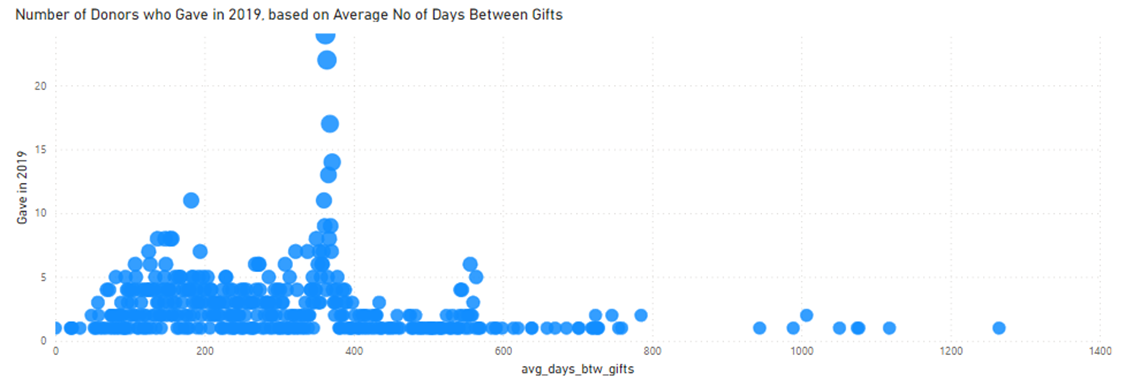
 
 
#### Features based on donor segmentation

We segmented the data based on a few different segmentation techniques used in the industry.
1.	Segmentation based on where they fall in their lifecycle - New, Renewed or Recovered Donors. At the end of each year the donors are assigned a new segment, based on their activity & previous renewal history:
* New Donors: gave for the first time to the organization as a response to a Direct Mailing appeal
* Renewed Donors: donors who are giving for at least the 2nd year in a row (were New, Recovered or Renewed the previous year). They have the highest renewal rate from year-to-year and they usually bring approx. 70% of the gross revenue.
* Recovered Donors: existing donors from the database who didnt give a gift last year but gave this year.


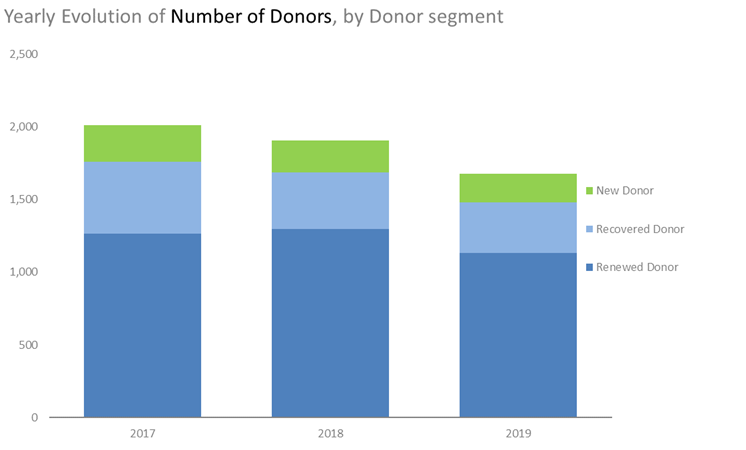


2.	Segmentation by the range of their annual cumulative giving (total $ donations within a year/donor) - see the chart below that shows how segmentation from previous years impacts giving
3.	Segmentation by donor movement – in terms of cumulative annual amount upgrades/downgrades (donors who gave more, less or the same as the previous year)

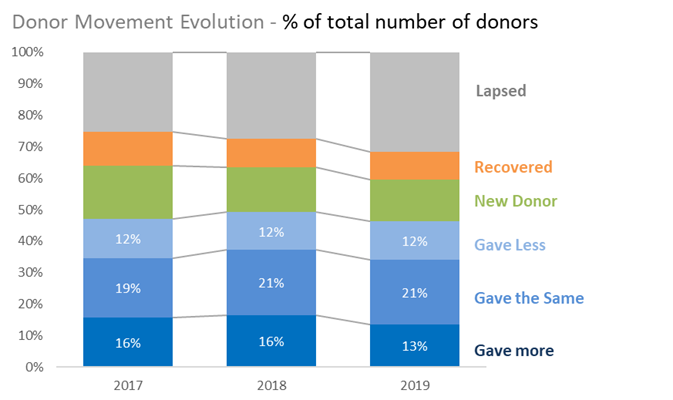


Let's see how the segmentation from previous years impacts the giving in 2019:

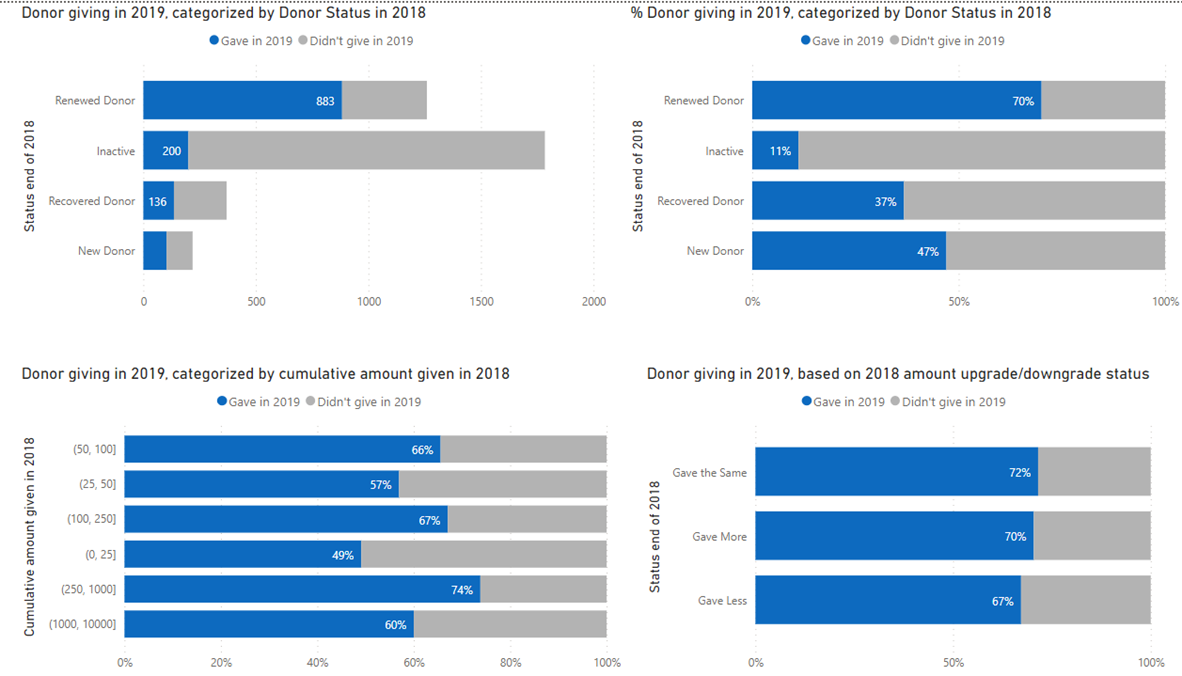

4.	And, lastly, RFM analysis. The RFM segmentation process groups and analyzes donors behavior on three parameters:
* Recency: How recent is the last donation (we used the number of days since last gift as measurement)
* Frequency: How often does the donor give (we used total number of gifts during the past 5 years as measurement)
* Monetary: How much money does the donor give (we used the sum of gifts for the past 5 years as measurement)

We calculated the R, F and M scores on a scale from 1 (worst) to 5 (best), using quintiles. Each quintile contains 20% of the donor base (the 5th quintile will include the donors with the best results per each parameter).
The final RFM score is a combination of the 3 parameters (ex: 111, 112, 212 etc. ) and gives us a total of 53 = 125 donor segments. 
To make these segments easier to work with, we used combinations of Recency and Frequency scores to create 10 donor segments: 
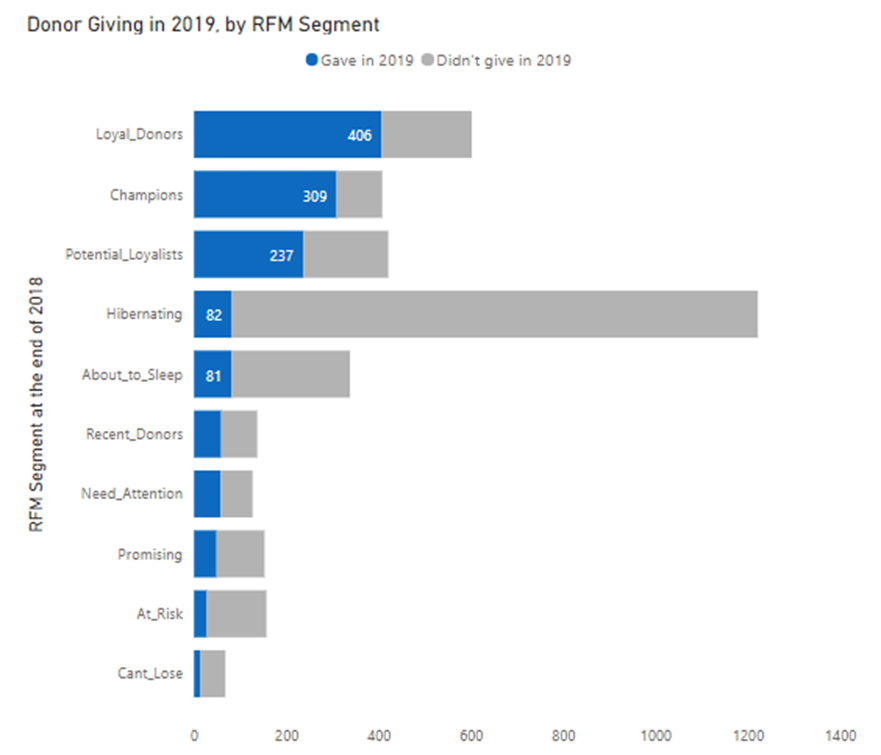

And lastly, let's have a look at the key influencers for predicting gave2019 identified using PowerBI. We used this later on to divide certain columns into bins:

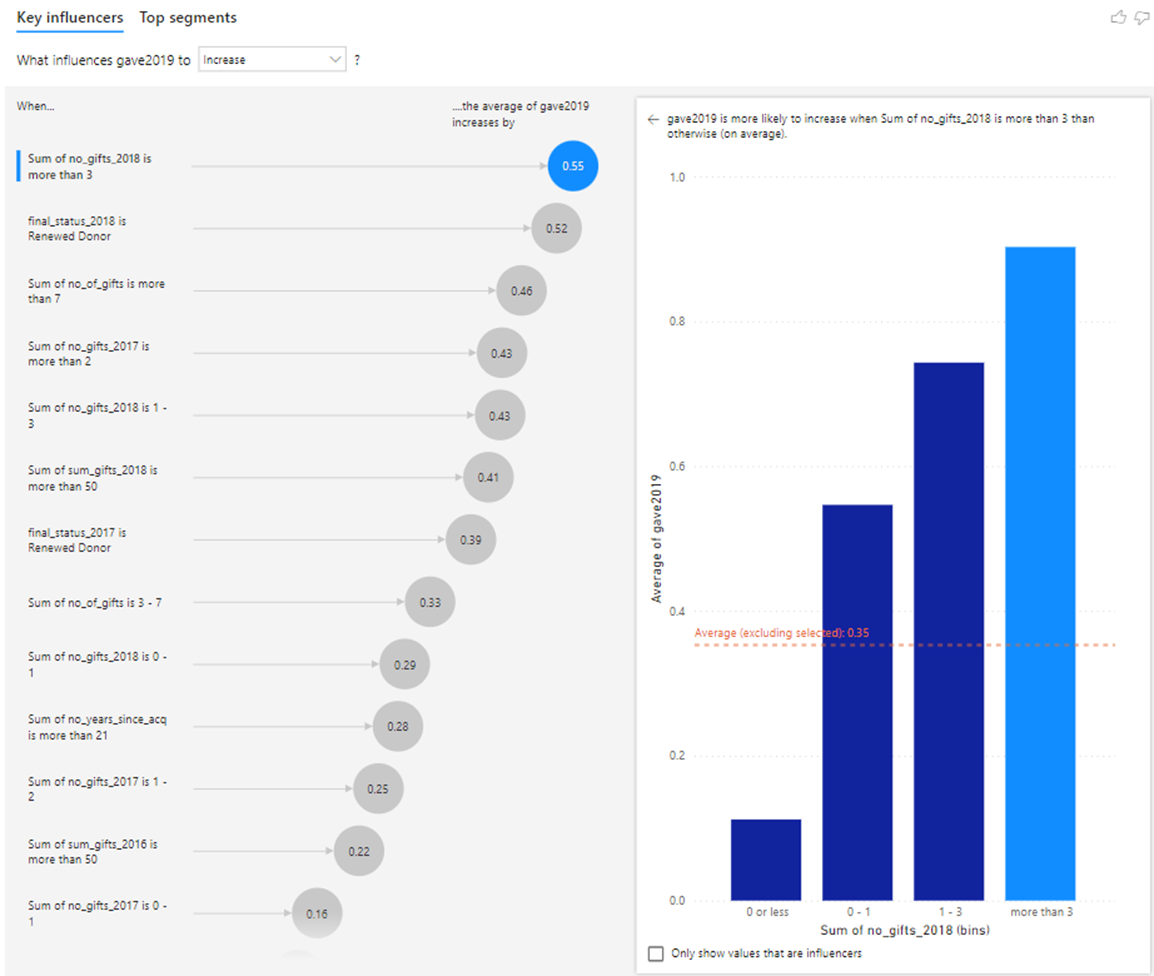

### Data Preparation <a class="anchor" id="prep"></a>

As the data has been previously cleaned, there were no columns that needed inputting.
However, all the features had to be created manually, using different types of grouping, summarizing and segmenting, as mentioned above.

The numeric columns that resulted were binned in different ways. This ended in the creation of over 100 features, a lot of which were highly correlated.

Using correlation matrices and VIF, we tried to create sets of variables with highest correlation to the target and lowest multicollinearity.


### Data Modelling <a class="anchor" id="model"></a>

As you will see in the notebook below, we tried various models and experimented with many feature sets (most of which ended up not being included), based on different feature selection algorithms, as well as on correlation charts. 

Stacking and bagging didn't make an important difference in terms of results. Scaling also didn't make a significant difference, as most variables were already binned in such a way that they were on a similar scale.

The highest average/precision/recall/F1 scores were in the 70% - 78% interval.

### Conclusion <a class="anchor" id="conclusion"></a>

One of the best models tried was the <b>Bagged AdaBoost Classifier</b>. Although the results are very similar to the other models, it seems more stable and it has the lowest number of variables.

Something that might improve the data model in the future might be acquiring more demographic data (gender, age band, income band, location etc.), which might have an impact. 

Using more historical data is less likely to improve it, as it seems that beyond the last 2 previous years, the historical indicators didn't make a big difference to the model.

## Part 1 - Preparing the Data - Calculating Features and Setting up the DataFrame <a class="anchor" id="part1"></a>

### Import all the libraries

In [1]:
import pandas as pd, numpy as np
import datetime
import sys
import os

In [2510]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2511]:
from pandas import ExcelWriter

In [2512]:
from xlsxwriter.utility import xl_range
from xlsxwriter.utility import xl_rowcol_to_cell

In [2513]:
# show the numpy arrays without truncating
np.set_printoptions(threshold=sys.maxsize) # to revert set it to threshold=1000

In [2514]:
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import AdaBoostClassifier,ExtraTreesClassifier
#from xgboost                 import XGBClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import precision_score, recall_score, f1_score, accuracy_score
from   sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split, KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2515]:
import statsmodels.api as sm

### Read the gifts file

In [2516]:
FOLDER = r"C:\Users\Irina\Documents\BCIT classes\COMP 4254 - Advanced data analytics\Assignment 2"
FILE    = "Gift history mockup data.xlsx"
path = FOLDER + "\\" + FILE

df = allgifts= pd.read_excel(path,index_col="GiftID",
                             dtype={'Gift_Date':np.datetime64,'Gift_Amount':np.float64,'first_gift_date':np.datetime64,'Appeal_Date':np.datetime64})

In [2517]:
# A sample of 3 random rows from the file
allgifts.sample(3)

,DonorID,Monthly Donor,Gift_Date,Gift_Amount,Gift Campaign,AppealID,Appeal_Name,House vs Acquisition appeal,Appeal Code,Appeal_Date,Appeal_Year,first_gift_date,first_gift_date_DM,first_gift_amount,1st Gift Campaign,first_gift_appeal,total_no_gifts_overall,total_gift_amount_overall
GiftID,,,,,,,,,,,,,,,,,,
00001-545-0000485753,146240,No,2019-01-02,25.0,House Mailing 18,Holiday 2017 Appeal 18,Christmas Appeal,House,2018-2102-07,2017-04-01,2018,2013-10-04,2013-10-04,35.0,Acquisition Mailing 13,2013 Fall Acquistion,6,185.0
00001-545-0000387777,163305,No,2016-04-17,100.0,House Mailing 16,Spring 2015 Newsletter 16,Spring Appeal,House,2016-2102-01,2015-04-01,2016,2015-11-06,2015-11-06,100.0,Acquisition Mailing 15,September 2014 Appeal - Acquisition 15,2,200.0
00001-545-0000443573,121753,No,2017-12-21,25.0,House Mailing 16,Renewal 1 2016 Appeal 16,Renewal,House,2016-2102-10,2016-02-26,2017,2011-03-14,2017-12-21,50.0,Donations to CFKF 10,Telethon Website 10,10,475.0


### Data quality checks & cleaning

In [2518]:
# A short description of each column. Check for columns with less rows and investigate missing values if necessary
# Make sure the data types are ok (dates are formatted as dates, amounts as integers or floats)
allgifts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, 00001-545-0000440399 to 00001-545-0000534128
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   DonorID                      13730 non-null  int64         
 1   Monthly Donor                13730 non-null  object        
 2   Gift_Date                    13730 non-null  datetime64[ns]
 3   Gift_Amount                  13730 non-null  float64       
 4   Gift Campaign                13730 non-null  object        
 5   AppealID                     13730 non-null  object        
 6   Appeal_Name                  13730 non-null  object        
 7   House vs Acquisition appeal  13730 non-null  object        
 8   Appeal Code                  13730 non-null  object        
 9   Appeal_Date                  11779 non-null  datetime64[ns]
 10  Appeal_Year                  13730 non-null  int64         
 11  first_gift_d

The only variable that is missing values is Appeal_Date - we can eliminate this variable, as it is not a reliable one (it doesn't reflect the actual date when the donor receives the appeal). We will use gift date and appeal year instead.

#### Checking for gift id duplicates

In [2519]:
if len(allgifts.index)!=len(set(allgifts.index)):
    print("There are gift ID duplicates in the data. Please double-check the data provided.")
else:
    print("There are no gift ID duplicates")

There are no gift ID duplicates


#### Calculate a few auxiliary fields and add them to the table  - gift year, appeal year, first gift year

In [2520]:
# checking the appeal ID names - see if they need cleaning/grouping etc
allgifts['Appeal_Name'].value_counts()

Christmas Appeal    4843
September Appeal    2075
Spring Appeal       1853
New Year Appeal     1356
Summer Appeal       1296
Renewal              812
Mother's Day         545
1st Renewal          340
Father's Day         252
Fall                 179
February             161
September             18
Name: Appeal_Name, dtype: int64

In [2521]:
# create a gift year column based on gift date
allgifts['gift_year']= allgifts['Gift_Date'].dt.year

# create a first gift year column
allgifts['first_gift_year'] = allgifts['first_gift_date'].dt.year
allgifts['first_gift_year_DM'] = allgifts['first_gift_date_DM'].dt.year
allgifts.rename(columns={'Appeal_Year':'appeal_year'},inplace=True)

# average number of days between gifts
allgifts['days_btw_gifts'] = (allgifts.sort_values('Gift_Date').groupby('DonorID').Gift_Date.shift() - allgifts.Gift_Date).dt.days.abs()

### Set up the training data
We want to create a model that predicts donor giving. To do that, we will isolate all the gifts from 2019 in a test set and keep the years 2015-2018 as a training set.

We will continue to calculate more features that we'll use for the model only using the 2015-2018 data

In [2522]:
# this will be used to generate training data
allgiftsUpTo2018 = allgifts[allgifts['gift_year']<2019]

allgiftsUpTo2018['appeal_year'].value_counts()

2016    2965
2017    2869
2018    2689
2015    2680
2014       9
Name: appeal_year, dtype: int64

### Setting up a new dataframe (table) that will include unique entries for donors. 

Used to calculate overall indicators/donor (ex: median/min/max gift, last appeal, most recent gift value etc) - these will be calculated for the last 5 years

In [2523]:
# we'll start with sorting the dataframe by donor ID and setting the index as donor ID as well
donors = allgiftsUpTo2018.sort_values(by = ['DonorID','Gift_Date'])
# set DonorID as index instead of GiftID - this way we can easily group the data by donor
donors = donors.reset_index().set_index(['DonorID'])

In [2524]:
donors.columns

Index(['GiftID', 'Monthly Donor', 'Gift_Date', 'Gift_Amount', 'Gift Campaign',
       'AppealID', 'Appeal_Name', 'House vs Acquisition appeal', 'Appeal Code',
       'Appeal_Date', 'appeal_year', 'first_gift_date', 'first_gift_date_DM',
       'first_gift_amount', '1st Gift Campaign', 'first_gift_appeal',
       'total_no_gifts_overall', 'total_gift_amount_overall', 'gift_year',
       'first_gift_year', 'first_gift_year_DM', 'days_btw_gifts'],
      dtype='object')

In [2525]:
# defined a function that returns the value of the most recent gift (last gift) per donor
# idxmax finds he index of the maximum value (max date per donor)
# the 'group' will be defined later when the function is called - we group donors by index (DonorID) 

def most_recent_gift(group,df=donors):
 
    max_date = group.max()
    recent_gift = df.loc[(df.index==group.idxmax()) & (df['Gift_Date']==max_date)]['Gift_Amount'].max()
                         
    return recent_gift

In [2526]:
# defined a function that returns the last AppealID per donor 

def last_appeal(group,df=donors):
    
    max_date=group.max()
    last_appeal = df.loc[(df.index==group.idxmax()) & (df['Gift_Date']==max_date)]['AppealID']
    for e in last_appeal:
        return e

In [2527]:
def gift_range(group):
    gift_range = group.max() -  group.min()
    return gift_range 

In [2528]:
donor_indicators = donors.groupby(donors.index).agg({'Gift_Date':['max',most_recent_gift],
                                                    'Gift_Amount':['min','max',gift_range,'median','mean','std','count','sum']
                                                    })

In [2529]:
donor_indicators.sample(3)

Gift_Date                  Gift_Amount                           \
               max most_recent_gift         min    max gift_range median   
DonorID                                                                    
142215  2018-02-22             25.0        25.0   30.0        5.0   25.0   
56745   2018-03-27            100.0       100.0  100.0        0.0  100.0   
91528   2018-12-19             50.0        20.0   50.0       30.0   25.0   

                                          
            mean        std count    sum  
DonorID                                   
142215    25.625   1.767767     8  205.0  
56745    100.000   0.000000     4  400.0  
91528     30.000  14.142136     4  120.0

In [2530]:
donor_indicators.shape[0]

3633

In [2531]:
donor_appeals = donors.groupby([donors.index,'Appeal_Name']).size().unstack()
donor_appeals = donor_appeals[['Christmas Appeal','September Appeal','Spring Appeal','Summer Appeal','New Year Appeal']]
donor_appeals.columns= ['giftsChristmas','giftsSeptember','giftsSpring','giftsSummer','giftsNY']
donor_appeals.sample(3)

,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY
DonorID,,,,,
170835,NaN,NaN,NaN,NaN,NaN
118527,1.0,NaN,NaN,NaN,NaN
72094,NaN,1.0,NaN,NaN,NaN


#### Drop the multi-level index (2 row header above) and rename the columns for donor_indicators

In [2532]:
donor_indicators.columns=donor_indicators.columns.droplevel(level=0)

In [2533]:
donor_indicators.columns

Index(['max', 'most_recent_gift', 'min', 'max', 'gift_range', 'median', 'mean',
       'std', 'count', 'sum'],
      dtype='object')

In [2534]:
donor_indicators.columns=['last_gift_date','most_recent_gift','min_gift_amount','max_gift_amount','gift_range','median_gift','mean_gift','std','no_of_gifts','total_gifts']

In [2535]:
donor_indicators = donor_indicators.join(donor_appeals)

In [2536]:
donor_indicators.sample()

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY
DonorID,,,,,,,,,,,,,,,
171858,2016-12-03,25.0,25.0,25.0,0.0,25.0,25.0,NaN,1,25.0,1.0,NaN,NaN,NaN,NaN


#### Calculate the number of gifts given per year and add them to the donor profile

In [2537]:
# grouped the data by donor and appeal_year and pivoted it (unstacked it) to show the years as columns
no_gifts_year = donors.groupby([donors.index,'appeal_year']).size().unstack()

#### Extracted the list of years from the data (integer format - they can be used for calculations)

In [2538]:
# changed the column names to include "no_gifts"
# also saved the years in a separate list (years_list) for looping through them later
years_list = no_gifts_year.columns 
no_gifts_year.columns = no_gifts_year.columns.astype(str)
no_gifts_year.columns = np.where(no_gifts_year.columns,"no_gifts_" + no_gifts_year.columns,no_gifts_year.columns)

In [2539]:
years_list

Int64Index([2014, 2015, 2016, 2017, 2018], dtype='int64', name='appeal_year')

In [2540]:
no_gifts_year.sample(1)

,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018
DonorID,,,,,
92139,NaN,1.0,NaN,NaN,NaN


In [2541]:
print(no_gifts_year.shape[0],donor_indicators.shape[0])

3633 3633


In [2542]:
# add the number of gifts per year to donor profile
donor_profile=donor_indicators.join(no_gifts_year)

In [2543]:
donor_profile.head(2)

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018
DonorID,,,,,,,,,,,,,,,,,,,,
2,2018-12-27,100.0,100.0,100.0,0.0,100.0,100.0,0.000000,2,200.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
57,2018-12-22,70.0,50.0,70.0,20.0,60.0,60.0,7.071068,5,300.0,3.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0


#### Add a simpler set of binary columns gave2015, gave2016 etc

In [2544]:
for year in years_list[2:]:
    col_name = 'gave' + str(year)
    donor_profile[col_name] = np.where(donor_profile["no_gifts_" + str(year)]>0,1,0)

#### Add the first gift date and first gift year (provided by the client) to the donor_profile

In [2545]:
# calculated the first appeal year based on the data we have
first_appeal_year = donors.groupby('DonorID')['appeal_year'].min()
first_appeal_year = pd.DataFrame(first_appeal_year)
first_appeal_year.columns = ['first_appeal_year']
# calculate average days between gifts and median days between gifts
avg_days_btw_gifts = donors.groupby('DonorID')['days_btw_gifts'].mean().round()
median_days_btw_gifts = donors.groupby('DonorID')['days_btw_gifts'].median().round()

In [2546]:
# # add first appeal year column to donors dataframe
# donors = donors.join(first_appeal_year)

In [2547]:
# add all the time related fields to the donor_profile dataframe
first_gift = donors.groupby([donors.index]).first_gift_date.max()
donor_profile['first_gift_date'] = first_gift
donor_profile['first_gift_year'] = donor_profile['first_gift_date'].dt.year
donor_profile['first_appeal_year'] = first_appeal_year
donor_profile['avg_days_btw_gifts'] = avg_days_btw_gifts
donor_profile['median_days_btw_gifts'] = median_days_btw_gifts

#### Added days since last gift and days since first gift

In [2548]:
# added days since last gift and days since first gift. We assume that the current date is January 1st, 2019
current_date = datetime.datetime(2019,1,1)
donor_profile.loc[:,'days_since_last_gift'] = (current_date - donor_profile.loc[:,'last_gift_date'])/np.timedelta64(1, 'D')
donor_profile.loc[:,'days_since_first_gift'] = (current_date - donor_profile.loc[:,'first_gift_date'])/np.timedelta64(1, 'D')

In [2549]:
donor_profile.sample(2)

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018,gave2016,gave2017,gave2018,first_gift_date,first_gift_year,first_appeal_year,avg_days_btw_gifts,median_days_btw_gifts,days_since_last_gift,days_since_first_gift
DonorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
181872,2018-05-25,50.0,50.0,50.0,0.0,50.0,50.0,NaN,1,50.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,0,1,2018-05-25,2018,2018,NaN,NaN,221.0,221.0
51936,2017-11-25,100.0,100.0,100.0,0.0,100.0,100.0,NaN,1,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,1,0,2003-02-05,2003,2017,NaN,NaN,402.0,5809.0


### Calculating the cumulative gift range for donors / last 3 years

In [2550]:
# grouped the data by donor and appeal_year and pivoted it (unstacked it) to show the years as columns and the sum of gifts per year
sum_gifts_year = donors.groupby([donors.index,'appeal_year'])['Gift_Amount'].sum().unstack()
sum_gifts_year.columns = sum_gifts_year.columns.astype(str)
sum_gifts_year.columns = np.where(sum_gifts_year.columns,"sum_gifts_" + sum_gifts_year.columns,sum_gifts_year.columns)
sum_gifts_year.sample(2)

,sum_gifts_2014,sum_gifts_2015,sum_gifts_2016,sum_gifts_2017,sum_gifts_2018
DonorID,,,,,
63968,NaN,NaN,150.0,100.0,NaN
63333,NaN,NaN,20.0,20.0,NaN


In [2551]:
# add the cumulative amounts to the donor_profile
donor_profile = donor_profile.join(sum_gifts_year)

In [2552]:
donor_profile.sample(2)

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018,gave2016,gave2017,gave2018,first_gift_date,first_gift_year,first_appeal_year,avg_days_btw_gifts,median_days_btw_gifts,days_since_last_gift,days_since_first_gift,sum_gifts_2014,sum_gifts_2015,sum_gifts_2016,sum_gifts_2017,sum_gifts_2018
DonorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
81484,2018-12-15,200.0,100.0,200.0,100.0,100.0,125.0,50.0,4,500.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1,1,1,2007-04-27,2007,2015,361.0,345.0,17.0,4267.0,NaN,100.0,100.0,100.0,200.0
81392,2018-11-27,35.0,35.0,35.0,0.0,35.0,35.0,0.0,6,210.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,3.0,1,1,1,2007-04-10,2007,2016,199.0,144.0,35.0,4284.0,NaN,NaN,70.0,35.0,105.0


### Calculating number of years since acquisition

In [2553]:
# create a column for the total number of years since acqusition
donor_profile['no_years_since_acq'] = donor_profile['last_gift_date'].dt.year  - donor_profile['first_gift_date'].dt.year

### Categorize each sum of gifts amount in a range - cumulative amounts categories

In [2554]:
years_list[2:]

Int64Index([2016, 2017, 2018], dtype='int64', name='appeal_year')

In [2555]:
# set up the new columns as categorical (amount interval) - for the last 3 years
for year in years_list[2:]:
    donor_profile[str("cum_amt_categ_") + str(year)]=np.nan
    
# set up the new columns as rank (will convert the amount intervals to a sequence of numbers) 
for year in years_list[2:]:
    donor_profile[str("cum_amt_rank_") + str(year)]=np.nan

In [2556]:
# set up columns that would show the cumulative amount category as a rank - 1 for 0-25 and 6 for 1000-10000
for year in years_list[2:]:
    donor_profile.iloc[:,donor_profile.columns.get_loc('cum_amt_rank_'+str(year))] = donor_profile.iloc[:,donor_profile.columns.get_loc('cum_amt_categ_'+str(year))]

# binning the sum of gifts per year column
for year in years_list[2:]:
    donor_profile.iloc[:,donor_profile.columns.get_loc('cum_amt_categ_'+str(year))] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('sum_gifts_'+str(year))],bins=[0,25,50,100,250,1000,10000])
    
# binning the sum of gifts per year column - with labels
for year in years_list[2:]:
    donor_profile.iloc[:,donor_profile.columns.get_loc("cum_amt_rank_"+str(year))] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('sum_gifts_'+str(year))],bins=[0,25,50,100,250,1000,10000],labels=[1,2,3,4,5,6])

In [2557]:
# the new rank columns are categorical columns, so we have to add 0 to the list of categories
# otherwise it won't let us fill the NaNs with 0 later (when we prepare the data for modelling)
categories = np.array([0,1,2,3,4,5,6])
# fill nans with zeros
for year in col_years[2:]:
    donor_profile.iloc[:,donor_profile.columns.get_loc("cum_amt_rank_"+str(year))] = pd.Categorical(donor_profile.iloc[:,donor_profile.columns.get_loc("cum_amt_rank_"+str(year))],categories=categories)
    donor_profile.iloc[:,donor_profile.columns.get_loc("cum_amt_rank_"+str(year))] = donor_profile.iloc[:,donor_profile.columns.get_loc("cum_amt_rank_"+str(year))].fillna(0)

In [2558]:
donor_profile[['cum_amt_rank_2016','cum_amt_categ_2016']].head(3)

,cum_amt_rank_2016,cum_amt_categ_2016
DonorID,,
2,0,NaN
57,3,"(50.0, 100.0]"
76,4,"(100.0, 250.0]"


### A quick look at the cumulative amounts histograms - another way to bin the total gift amounts per year

In [2559]:
# set the chart details
sns.set(rc={"figure.figsize":(9, 4)}, style="darkgrid")

<AxesSubplot:>

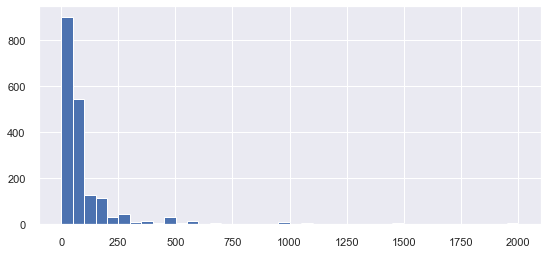

In [2560]:
donor_profile['sum_gifts_2018'].hist(bins=40)

<AxesSubplot:>

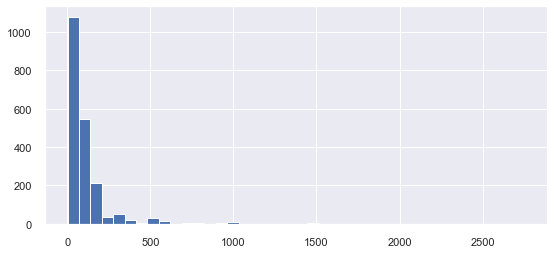

In [2561]:
donor_profile['sum_gifts_2017'].hist(bins=40)

Based on the data exploration performed in PowerBI, we set up an alternative way of binning the cumulative annual amounts

In [2562]:
donor_profile['sum_gifts_bins_2018'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('sum_gifts_2018')],bins=[0,50,donor_profile['sum_gifts_2018'].max()])
donor_profile['sum_gifts_bins_2017'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('sum_gifts_2017')],bins=[0,55,donor_profile['sum_gifts_2017'].max()])
donor_profile['sum_gifts_bins_2016'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('sum_gifts_2016')],bins=[0,50,donor_profile['sum_gifts_2016'].max()])

### Binning the number of gifts per year, total number of gifts and std

In [2563]:
print( donor_profile['no_gifts_2018'].value_counts(),donor_profile['no_gifts_2017'].value_counts())

1.0    1341
2.0     325
3.0     111
4.0      32
5.0      18
6.0      12
7.0       7
9.0       2
8.0       1
Name: no_gifts_2018, dtype: int64 1.0    1459
2.0     362
3.0     127
4.0      42
5.0      21
6.0       3
7.0       2
Name: no_gifts_2017, dtype: int64


In [2564]:
# we used the data exploration information from PowerBI to set the bins
donor_profile['no_gifts_bins_2018'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('no_gifts_2018')],bins=[0,1,3,donor_profile['no_gifts_2018'].max()])
donor_profile['no_gifts_bins_2017'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('no_gifts_2017')],bins=[0,1,2,donor_profile['no_gifts_2017'].max()])
print(donor_profile[['no_gifts_2018','no_gifts_bins_2018','no_gifts_2017','no_gifts_bins_2017']].sample(2))

         no_gifts_2018 no_gifts_bins_2018  no_gifts_2017 no_gifts_bins_2017
DonorID                                                                    
183810             1.0         (0.0, 1.0]            NaN                NaN
17481              1.0         (0.0, 1.0]            1.0         (0.0, 1.0]


<AxesSubplot:>

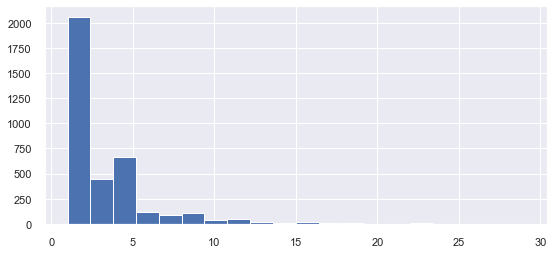

In [2565]:
# quick look at the total number of gifts divided into bins
donor_profile['no_of_gifts'].hist(bins=20)

In [2566]:
donor_profile['no_of_gifts_bins'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('no_of_gifts')],bins=[0,3,7,donor_profile['no_of_gifts'].max()])
donor_profile[['no_of_gifts_bins','no_of_gifts']].sample(2)

,no_of_gifts_bins,no_of_gifts
DonorID,,
102571,"(0, 3]",1
80905,"(7, 29]",18


In [2567]:
# bin the std column into 0 and >0
donor_profile['std_over_0'] = np.where(donor_profile['std']>0,1,0)

### Bin the number of days between gifts, years since acqusition

<AxesSubplot:>

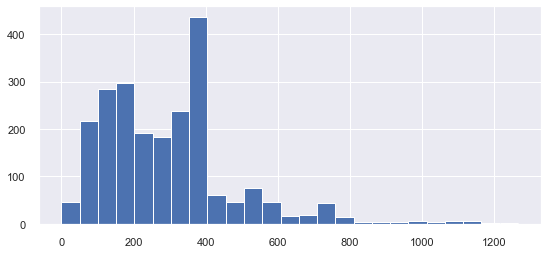

In [2568]:
# quick look at the histogram
donor_profile['median_days_btw_gifts'].hist(bins=25)

In [2569]:
donor_profile['median_days_btw_gifts_bins'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('median_days_btw_gifts')],bins=[0,400,donor_profile['median_days_btw_gifts'].max()])

<AxesSubplot:>

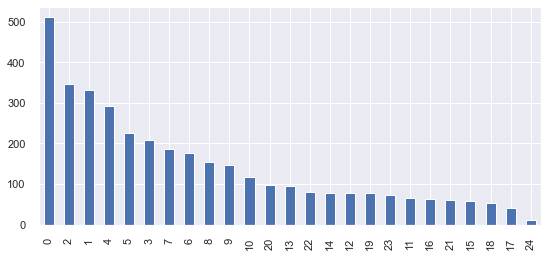

In [2570]:
# check the bar plot of number of years since acquisition
donor_profile['no_years_since_acq'].value_counts().plot(kind='bar')

In [2571]:
# divide the number of years since acquisition into bins
donor_profile['no_years_since_acq_bins'] = pd.cut(x=donor_profile.iloc[:,donor_profile.columns.get_loc('no_years_since_acq')],bins=[0,3,10,donor_profile['no_years_since_acq'].max()])

### Calculate intermediary status (active/inactive/not yet acquired) for the last 5 years, using the gift history and the first gift date

To simplify the process, we will first calculate an intermediary status - it tells us if the donor was active or inactive each year, or if it wasn't yet acquired at the time of the calculation

In [2572]:
# add the Intermediary columns to the data frame for each year - at first they will be empty
for year in col_years:
    donor_profile[str("intermediary_status_") + str(year)]=np.nan

In [2573]:
donor_profile.columns

Index(['last_gift_date', 'most_recent_gift', 'min_gift_amount',
       'max_gift_amount', 'gift_range', 'median_gift', 'mean_gift', 'std',
       'no_of_gifts', 'total_gifts', 'giftsChristmas', 'giftsSeptember',
       'giftsSpring', 'giftsSummer', 'giftsNY', 'no_gifts_2014',
       'no_gifts_2015', 'no_gifts_2016', 'no_gifts_2017', 'no_gifts_2018',
       'gave2016', 'gave2017', 'gave2018', 'first_gift_date',
       'first_gift_year', 'first_appeal_year', 'avg_days_btw_gifts',
       'median_days_btw_gifts', 'days_since_last_gift',
       'days_since_first_gift', 'sum_gifts_2014', 'sum_gifts_2015',
       'sum_gifts_2016', 'sum_gifts_2017', 'sum_gifts_2018',
       'no_years_since_acq', 'cum_amt_categ_2016', 'cum_amt_categ_2017',
       'cum_amt_categ_2018', 'cum_amt_rank_2016', 'cum_amt_rank_2017',
       'cum_amt_rank_2018', 'sum_gifts_bins_2018', 'sum_gifts_bins_2017',
       'sum_gifts_bins_2016', 'no_gifts_bins_2018', 'no_gifts_bins_2017',
       'no_of_gifts_bins', 'std_over_0',

#### Calculated the actual values for the "intermediary_status" columns

In [2574]:
for year in years_list:
    for record in range(0,donor_profile.shape[0]):
        if (donor_profile.iloc[record,donor_profile.columns.get_loc('first_appeal_year')] > year-1
           and donor_profile.iloc[record,donor_profile.columns.get_loc('first_gift_year')] > year):
            donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))]= "Not yet acquired"
            
        elif (donor_profile.iloc[record,donor_profile.columns.get_loc('first_appeal_year')] == year
            and donor_profile.iloc[record,donor_profile.columns.get_loc('first_gift_year')] >= year):
            donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] = "New donor"
            
        elif donor_profile.iloc[record,donor_profile.columns.get_loc('no_gifts_'+str(year))] >=1 :
            donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] = "Active"
            
        else:
            donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))]= "Inactive"
    

In [2575]:
donor_profile.sample(2)

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018,gave2016,gave2017,gave2018,first_gift_date,first_gift_year,first_appeal_year,avg_days_btw_gifts,median_days_btw_gifts,days_since_last_gift,days_since_first_gift,sum_gifts_2014,sum_gifts_2015,sum_gifts_2016,sum_gifts_2017,sum_gifts_2018,no_years_since_acq,cum_amt_categ_2016,cum_amt_categ_2017,cum_amt_categ_2018,cum_amt_rank_2016,cum_amt_rank_2017,cum_amt_rank_2018,sum_gifts_bins_2018,sum_gifts_bins_2017,sum_gifts_bins_2016,no_gifts_bins_2018,no_gifts_bins_2017,no_of_gifts_bins,std_over_0,median_days_btw_gifts_bins,no_years_since_acq_bins,intermediary_status_2014,intermediary_status_2015,intermediary_status_2016,intermediary_status_2017,intermediary_status_2018
DonorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
92218,2018-12-20,25.0,15.0,25.0,10.0,20.0,21.5625,3.010399,16,345.0,6.0,2.0,NaN,2.0,2.0,NaN,4.0,3.0,4.0,5.0,1,1,1,2008-06-20,2008,2015,85.0,71.0,12.0,3847.0,NaN,95.0,60.0,75.0,115.0,10,"(50, 100]","(50, 100]","(100, 250]",3,3,4,"(50.0, 2000.0]","(55.0, 2750.0]","(50.0, 10200.0]","(3.0, 9.0]","(2.0, 7.0]","(7, 29]",1,"(0.0, 400.0]","(3, 10]",Inactive,Active,Active,Active,Active
68418,2018-12-22,20.0,20.0,25.0,5.0,22.5,22.5000,2.886751,4,90.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1,1,1,2005-03-24,2005,2015,362.0,360.0,10.0,5031.0,NaN,25.0,20.0,25.0,20.0,13,"(0, 25]","(0, 25]","(0, 25]",1,1,1,"(0.0, 50.0]","(0.0, 55.0]","(0.0, 50.0]","(0.0, 1.0]","(0.0, 1.0]","(3, 7]",1,"(0.0, 400.0]","(10, 24]",Inactive,Active,Active,Active,Active


### Calculate the final segment columns

Building on the intermediary status, we'll calculate the final segment, which can be:
- New Donor - newly acquired during the respective year
- Second Year New Donors - was acquired the previous year and he's renewing the gift
- Renewed donor - existing donor, gave last year and he's renewing the gift
- Recovered - gave the current year, didn't give last year, but gave in the past
- Inactive - a donor in our database who didn't give this year

In [2576]:
# add the final segment columns to the data frame for each year - at first they will be empty
for year in years_list[2:]:
    donor_profile[str("final_status_") + str(year)]=np.nan

In [2577]:
for year in years_list[2:]:
    for record in range(0,donor_profile.shape[0]):
        if donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == "New donor" :
            donor_profile.iloc[record,donor_profile.columns.get_loc('final_status_'+str(year))]= "New Donor"
            
        elif donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == "Not yet acquired":
            donor_profile.iloc[record,donor_profile.columns.get_loc('final_status_'+str(year))]= "Not yet acquired"
            
        elif donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == "Inactive":
            donor_profile.iloc[record,donor_profile.columns.get_loc('final_status_'+str(year))]= "Inactive"
            
        elif (donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == "Active" 
            and  donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year-1))] == "Inactive"):
            donor_profile.iloc[record,donor_profile.columns.get_loc('final_status_'+str(year))]= "Recovered Donor"            
          
        elif (donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == "Active" 
            and  (donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year-1))] == "Active"
            or   donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year-1))] == "New donor")):
            donor_profile.iloc[record,donor_profile.columns.get_loc('final_status_'+str(year))]= "Renewed Donor"         
        
        

In [2578]:
# create a dictionary to attribute a number to each status
status_dict = {"Not yet acquired":0, "Inactive":1, "New donor":2, "Recovered Donor":3, "Renewed Donor":4 }

# add the final segment columns to the data frame for each year - at first they will be empty
for year in years_list[2:]:
    donor_profile[str("final_status_no_") + str(year)]=np.nan
for year in years_list[2:]:
    donor_profile[str("final_status_no_") + str(year)] = donor_profile[str("final_status_") + str(year)].map(status_dict)
    
donor_profile.head(2)

,last_gift_date,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018,gave2016,gave2017,gave2018,first_gift_date,first_gift_year,first_appeal_year,avg_days_btw_gifts,median_days_btw_gifts,days_since_last_gift,days_since_first_gift,sum_gifts_2014,sum_gifts_2015,sum_gifts_2016,sum_gifts_2017,sum_gifts_2018,no_years_since_acq,cum_amt_categ_2016,cum_amt_categ_2017,cum_amt_categ_2018,cum_amt_rank_2016,cum_amt_rank_2017,cum_amt_rank_2018,sum_gifts_bins_2018,sum_gifts_bins_2017,sum_gifts_bins_2016,no_gifts_bins_2018,no_gifts_bins_2017,no_of_gifts_bins,std_over_0,median_days_btw_gifts_bins,no_years_since_acq_bins,intermediary_status_2014,intermediary_status_2015,intermediary_status_2016,intermediary_status_2017,intermediary_status_2018,final_status_2016,final_status_2017,final_status_2018,final_status_no_2016,final_status_no_2017,final_status_no_2018
DonorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2018-12-27,100.0,100.0,100.0,0.0,100.0,100.0,0.000000,2,200.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0,1,1,1996-10-31,1996,2017,384.0,384.0,5.0,8097.0,NaN,NaN,NaN,100.0,100.0,22,NaN,"(50, 100]","(50, 100]",0,3,3,"(50.0, 2000.0]","(55.0, 2750.0]",NaN,"(0.0, 1.0]","(0.0, 1.0]","(0, 3]",0,"(0.0, 400.0]","(10, 24]",Inactive,Inactive,Inactive,Active,Active,Inactive,Recovered Donor,Renewed Donor,1.0,3.0,4.0
57,2018-12-22,70.0,50.0,70.0,20.0,60.0,60.0,7.071068,5,300.0,3.0,1.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1,1,1,2000-11-10,2000,2015,361.0,356.0,10.0,6626.0,NaN,110.0,60.0,60.0,70.0,18,"(50.0, 100.0]","(50, 100]","(50, 100]",3,3,3,"(50.0, 2000.0]","(55.0, 2750.0]","(50.0, 10200.0]","(0.0, 1.0]","(0.0, 1.0]","(3, 7]",1,"(0.0, 400.0]","(10, 24]",Inactive,Active,Active,Active,Active,Renewed Donor,Renewed Donor,Renewed Donor,4.0,4.0,4.0


### Donor upgrades/downgrades

For this segmentation, we'll look at the donors who gave more, less or the same compared to last year.

We'll also have to identify the donors who weren't yet acquired each year, were new or lapsed/inactive, to be able to differentiate them from the ones with upgrades/downgrades.

In [2579]:
for year in years_list[2:]:
    donor_profile['donor_upgrade_' + str(year)] = np.NaN
for year in years_list[2:]:
    donor_profile['donor_upgrade_rank_' + str(year)] = np.nan

In [2580]:
for year in years_list[2:]:
    for record in range(0,donor_profile.shape[0]):
        if  donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))]== "Not yet acquired":
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = 'Not yet acquired' 
        elif donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == 'New donor':
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = 'New Donor'  
        elif ( donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))]> donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]
            and np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]) !=True):
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = "Gave More"
        elif (donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))] == donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]
            and np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))]) != True):
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = "Gave the Same"
        elif (donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))] < donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]
            and np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))]) != True):
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = "Gave Less"
        elif (np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))]) != True
            and np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]) == True):
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = "Recovered"
        elif (np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year))]) == True
            and np.isnan(donor_profile.iloc[record,donor_profile.columns.get_loc('sum_gifts_'+str(year-1))]) != True):
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = "Lapsed"
        elif donor_profile.iloc[record,donor_profile.columns.get_loc('intermediary_status_'+str(year))] == 'Inactive':
            donor_profile.iloc[record,donor_profile.columns.get_loc('donor_upgrade_'+str(year))] = 'Inactive'              


<AxesSubplot:>

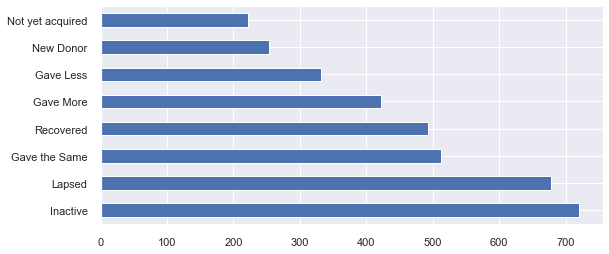

In [2581]:
donor_profile['donor_upgrade_2017'].value_counts().plot(kind='barh')

In [2582]:
# create a dictionary to attribute a number to each status
upgrade_dict = {'Not yet acquired':0, 'New donor':0, "Recovered":0, "Lapsed":0, 'Inactive':0, 
                "Gave Less":1, "Gave the Same":2, "Gave More":3}
for year in years_list[2:]:
    donor_profile['donor_upgrade_rank_' + str(year)] = donor_profile['donor_upgrade_'+str(year)].map(upgrade_dict)
    
donor_profile[['donor_upgrade_2016','donor_upgrade_rank_2016']].sample(2)

,donor_upgrade_2016,donor_upgrade_rank_2016
DonorID,,
184246,Not yet acquired,0.0
141464,Gave More,3.0


### RFM analysis

We will now segment the data based on RFM analysis - Recency, Frecquency and Monetary Value.
As this is a widely used type of segmentation, we will try to see if the segments created will help create a better model.

In [2583]:
years_list

Int64Index([2014, 2015, 2016, 2017, 2018], dtype='int64', name='appeal_year')

In [2584]:
# we'll separate only the columns we need for RFM segmentation in a new df
rfm_profile = donor_profile.loc[:,['last_gift_date','no_of_gifts','total_gifts','no_gifts_'+str(years_list[-1]),'sum_gifts_'+str(years_list[-1])]]

# # add the number of years active
# no_gifts_year.loc[:,'no_years_active'] = no_gifts_year.iloc[:,0:len(years_list)].count(axis=1)
# rfm_profile = rfm_profile.join(no_gifts_year['no_years_active'])

# # add years since acquisition
# rfm_profile.loc[:,'years_since_acq'] = current_year - rfm_profile.loc[:,'first_gift_date'].dt.year

# add days since last gift
rfm_profile.loc[:,'days_since_last_gift'] = (current_date - rfm_profile.loc[:,'last_gift_date'])/np.timedelta64(1, 'D')

rfm_profile.sample(1)

,last_gift_date,no_of_gifts,total_gifts,no_gifts_2018,sum_gifts_2018,days_since_last_gift
DonorID,,,,,,
181772,2018-05-17,1,25.0,1.0,25.0,229.0


In [2585]:
# the number of gifts and average annual giving are calculated for the last 4 years

rfm_profile.loc[:,'R'] = rfm_profile['days_since_last_gift']
rfm_profile.loc[:,'F'] = rfm_profile['no_of_gifts']
rfm_profile.loc[:,'M'] = rfm_profile['total_gifts']

# calculating quintiles for R, F, M

quintiles = rfm_profile[['R', 'F', 'M']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'R': {0.2: 42.0, 0.4: 231.0, 0.6: 402.0, 0.8: 815.0},
 'F': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 4.0},
 'M': {0.2: 50.0, 0.4: 95.0, 0.6: 150.0, 0.8: 300.0}}

In [2586]:
# defining functions that assign ranks from 1 to 5:

def r_score(x):
    if x <= quintiles['R'][.2]:
        return 5
    elif x <= quintiles['R'][.4]:
        return 4
    elif x <= quintiles['R'][.6]:
        return 3
    elif x <= quintiles['R'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [2587]:
# applying the functions above:

rfm_profile.loc[:,'Recency'] = rfm_profile['R'].apply(lambda x: r_score(x))
rfm_profile.loc[:,'Frequency'] = rfm_profile['F'].apply(lambda x: fm_score(x, 'F'))
rfm_profile.loc[:,'Monetary'] = rfm_profile['M'].apply(lambda x: fm_score(x, 'M'))

# RFM score

rfm_profile.loc[:,'RFM Score'] = rfm_profile['Recency'].map(str) + rfm_profile['Frequency'].map(str) + rfm_profile['Monetary'].map(str)
rfm_profile.head(2)

,last_gift_date,no_of_gifts,total_gifts,no_gifts_2018,sum_gifts_2018,days_since_last_gift,R,F,M,Recency,Frequency,Monetary,RFM Score
DonorID,,,,,,,,,,,,,
2,2018-12-27,2,200.0,1.0,100.0,5.0,5.0,2,200.0,5,2,4,524
57,2018-12-22,5,300.0,1.0,70.0,10.0,10.0,5,300.0,5,5,4,554


In [2588]:
# Allocated a segment to each donor by mapping the scores for Recency and Frequency only

# Created a dictionary for the segments - added the possible combinations of codes for each segment
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Lose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Donors',
    r'41': 'Promising',
    r'51': 'Recent_Donors',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

# Created a Segment column - first just by concatenating the Recency and Frequency values
rfm_profile.loc[:,'Segment'] = rfm_profile['Recency'].map(str) + rfm_profile['Frequency'].map(str)

# Replace the numeric values combinations with the corresponding segment from the dictionary
rfm_profile.loc[:,'Segment'] = rfm_profile['Segment'].replace(segt_map, regex=True)
rfm_profile.head(2)

,last_gift_date,no_of_gifts,total_gifts,no_gifts_2018,sum_gifts_2018,days_since_last_gift,R,F,M,Recency,Frequency,Monetary,RFM Score,Segment
DonorID,,,,,,,,,,,,,,
2,2018-12-27,2,200.0,1.0,100.0,5.0,5.0,2,200.0,5,2,4,524,Potential_Loyalists
57,2018-12-22,5,300.0,1.0,70.0,10.0,10.0,5,300.0,5,5,4,554,Champions


In [2589]:
# create a dictionary to allocate a number to each segment
segment_dict = {'Champions':1,'Loyal_Donors':2,'Potential_Loyalists':3,'Promising':4,'Recent_Donors':5,
                'Cant_Lose':6,'Need_Attention':7,'At_Risk':8,'About_to_Sleep':9,'Hibernating':10}

# add the segment to donor profile
donor_profile['Segment'] = rfm_profile['Segment']

# add the segment number to donor profile
donor_profile['segment_number'] = donor_profile['Segment'].map(segment_dict)

In [2590]:
# drop the dates
# donor_profile.drop(['first_gift_date','last_gift_date'],axis=1,inplace=True)

### Prepare the number of gifts given in 2019 - for future data models

In [2591]:
# extract the number of gifts given in 2019 from the original data

donors_all = allgifts.sort_values(by = ['DonorID','Gift_Date'])
# set DonorID as index instead of GiftID - this way we can easily group the data by donor
donors_all = donors_all.reset_index().set_index(['DonorID'])

# grouped the data by donor and appeal_year and pivoted it (unstacked it) to show the years as columns
no_gifts_all_years = donors_all.groupby([donors_all.index,'appeal_year']).size().unstack()

### Export the data for PowerBI visualizations

In [2592]:
donor_profile_viz = donor_profile.join(no_gifts_all_years[2019],how='left')

In [2593]:
donor_profile_viz['gave2019'] = np.where(donor_profile_viz[2019]>0, 1, 0)
donor_profile_viz['gave2019yn'] = np.where(donor_profile_viz[2019]>0, 'yes', 'no')

In [2594]:
# export to csv
donor_profile_viz.to_csv(r'C:\Users\Irina\Documents\BCIT classes\COMP 4254 - Advanced data analytics\Assignment 2\Donor_profile_for_viz.csv')

## Part 2 - Data Modelling <a class="anchor" id="modelling"></a>

### Dummy Variables
We have a few category columns, as well as binned columns that need to be turned into numerical ones.
We will use dummy variables to prepare the data for modelling.

In [2595]:
donor_profile.columns

Index(['last_gift_date', 'most_recent_gift', 'min_gift_amount',
       'max_gift_amount', 'gift_range', 'median_gift', 'mean_gift', 'std',
       'no_of_gifts', 'total_gifts', 'giftsChristmas', 'giftsSeptember',
       'giftsSpring', 'giftsSummer', 'giftsNY', 'no_gifts_2014',
       'no_gifts_2015', 'no_gifts_2016', 'no_gifts_2017', 'no_gifts_2018',
       'gave2016', 'gave2017', 'gave2018', 'first_gift_date',
       'first_gift_year', 'first_appeal_year', 'avg_days_btw_gifts',
       'median_days_btw_gifts', 'days_since_last_gift',
       'days_since_first_gift', 'sum_gifts_2014', 'sum_gifts_2015',
       'sum_gifts_2016', 'sum_gifts_2017', 'sum_gifts_2018',
       'no_years_since_acq', 'cum_amt_categ_2016', 'cum_amt_categ_2017',
       'cum_amt_categ_2018', 'cum_amt_rank_2016', 'cum_amt_rank_2017',
       'cum_amt_rank_2018', 'sum_gifts_bins_2018', 'sum_gifts_bins_2017',
       'sum_gifts_bins_2016', 'no_gifts_bins_2018', 'no_gifts_bins_2017',
       'no_of_gifts_bins', 'std_over_0',

In [2596]:
tempDf = donor_profile[['cum_amt_categ_2016','cum_amt_categ_2017','cum_amt_categ_2018',
                       'intermediary_status_2016','intermediary_status_2017','intermediary_status_2018',
                       'final_status_2016','final_status_2017','final_status_2018',
                        'Segment','median_days_btw_gifts_bins',
                         'no_gifts_bins_2018',
                         'no_gifts_bins_2017',
                         'no_years_since_acq_bins',
                        'no_of_gifts_bins',
                         'sum_gifts_bins_2018',
                         'sum_gifts_bins_2017',
                         'sum_gifts_bins_2016',
                        'donor_upgrade_2016',
                         'donor_upgrade_2017',
                         'donor_upgrade_2018',
                         ]]

# get dummies
dummyDf = pd.get_dummies(tempDf,columns=['cum_amt_categ_2016','cum_amt_categ_2017','cum_amt_categ_2018',
                       'intermediary_status_2016','intermediary_status_2017','intermediary_status_2018',
                       'final_status_2016','final_status_2017','final_status_2018',
                        'Segment','median_days_btw_gifts_bins',
                         'no_gifts_bins_2018',
                         'no_gifts_bins_2017',
                         'no_years_since_acq_bins',
                        'no_of_gifts_bins',
                         'sum_gifts_bins_2018',
                         'sum_gifts_bins_2017',
                         'sum_gifts_bins_2016',
                        'donor_upgrade_2016',
                         'donor_upgrade_2017',
                         'donor_upgrade_2018',
                         ])

donor_profile = pd.concat(([donor_profile,dummyDf]),axis=1)

In [2597]:
pd.set_option('display.max_columns', None)

### Clean up the final dataframe we'll use for modelling <a class="anchor" id="cleanup"></a>

- drop unnecessary columns (text columns, date columns)
- eliminate nans

In [2598]:
col_list = donor_profile.columns.values.tolist () 
col_list

['last_gift_date',
 'most_recent_gift',
 'min_gift_amount',
 'max_gift_amount',
 'gift_range',
 'median_gift',
 'mean_gift',
 'std',
 'no_of_gifts',
 'total_gifts',
 'giftsChristmas',
 'giftsSeptember',
 'giftsSpring',
 'giftsSummer',
 'giftsNY',
 'no_gifts_2014',
 'no_gifts_2015',
 'no_gifts_2016',
 'no_gifts_2017',
 'no_gifts_2018',
 'gave2016',
 'gave2017',
 'gave2018',
 'first_gift_date',
 'first_gift_year',
 'first_appeal_year',
 'avg_days_btw_gifts',
 'median_days_btw_gifts',
 'days_since_last_gift',
 'days_since_first_gift',
 'sum_gifts_2014',
 'sum_gifts_2015',
 'sum_gifts_2016',
 'sum_gifts_2017',
 'sum_gifts_2018',
 'no_years_since_acq',
 'cum_amt_categ_2016',
 'cum_amt_categ_2017',
 'cum_amt_categ_2018',
 'cum_amt_rank_2016',
 'cum_amt_rank_2017',
 'cum_amt_rank_2018',
 'sum_gifts_bins_2018',
 'sum_gifts_bins_2017',
 'sum_gifts_bins_2016',
 'no_gifts_bins_2018',
 'no_gifts_bins_2017',
 'no_of_gifts_bins',
 'std_over_0',
 'median_days_btw_gifts_bins',
 'no_years_since_acq_bin

In [2599]:
# drop all the categorical (text) and date columns and save them in a new dataframe for the preparing the data models

df = donor_profile.copy()
df = df.drop(['last_gift_date','first_appeal_year', 'first_gift_date',
#                          'no_years_since_acq_2016',
#                          'no_years_since_acq_2017',
#                          'no_years_since_acq_2018',
#                          'no_years_since_acq_2015',
                         'cum_amt_categ_2016',
                         'cum_amt_categ_2017',
                         'cum_amt_categ_2018',                         
                         'intermediary_status_2014',
                         'intermediary_status_2015',
                         'intermediary_status_2016',
                         'intermediary_status_2017',
                         'intermediary_status_2018',
                         'final_status_2016',
                         'final_status_2017',
                         'final_status_2018',
                         'Segment',
                         'donor_upgrade_2016',
                         'donor_upgrade_2017',
                         'donor_upgrade_2018',
                         'donor_upgrade_2016_Inactive',
                         'donor_upgrade_2016_Lapsed',
                         'donor_upgrade_2016_New Donor',
                         'donor_upgrade_2016_Not yet acquired',
                         'donor_upgrade_2016_Recovered',
                         'donor_upgrade_2017_Inactive',
                         'donor_upgrade_2017_Lapsed',
                         'donor_upgrade_2017_New Donor',
                         'donor_upgrade_2017_Not yet acquired',
                         'donor_upgrade_2017_Recovered',
                         'donor_upgrade_2018_Inactive',
                         'donor_upgrade_2018_Lapsed',
                         'donor_upgrade_2018_New Donor',
                         'donor_upgrade_2018_Recovered',
                         'sum_gifts_bins_2018',
                         'sum_gifts_bins_2017',
                         'sum_gifts_bins_2016',
                         'no_gifts_bins_2018',
                         'no_gifts_bins_2017',
                         'no_of_gifts_bins',
                         'median_days_btw_gifts_bins',
                         'no_years_since_acq_bins',],axis=1)

In [2600]:
# add the 2019 giving data to df
df = df.join(no_gifts_all_years[2019])

In [2601]:
# fill all the NaNs
df = df.fillna(0)

# create a 'gave2019' column
df['gave2019'] = np.where(df[2019]>0, 1, 0)

# delete the 2019 column
del df[2019]

In [2602]:
df.head(2)

,most_recent_gift,min_gift_amount,max_gift_amount,gift_range,median_gift,mean_gift,std,no_of_gifts,total_gifts,giftsChristmas,giftsSeptember,giftsSpring,giftsSummer,giftsNY,no_gifts_2014,no_gifts_2015,no_gifts_2016,no_gifts_2017,no_gifts_2018,gave2016,gave2017,gave2018,first_gift_year,avg_days_btw_gifts,median_days_btw_gifts,days_since_last_gift,days_since_first_gift,sum_gifts_2014,sum_gifts_2015,sum_gifts_2016,sum_gifts_2017,sum_gifts_2018,no_years_since_acq,cum_amt_rank_2016,cum_amt_rank_2017,cum_amt_rank_2018,std_over_0,final_status_no_2016,final_status_no_2017,final_status_no_2018,donor_upgrade_rank_2016,donor_upgrade_rank_2017,donor_upgrade_rank_2018,segment_number,"cum_amt_categ_2016_(0, 25]","cum_amt_categ_2016_(25, 50]","cum_amt_categ_2016_(50, 100]","cum_amt_categ_2016_(100, 250]","cum_amt_categ_2016_(250, 1000]","cum_amt_categ_2016_(1000, 10000]","cum_amt_categ_2017_(0, 25]","cum_amt_categ_2017_(25, 50]","cum_amt_categ_2017_(50, 100]","cum_amt_categ_2017_(100, 250]","cum_amt_categ_2017_(250, 1000]","cum_amt_categ_2017_(1000, 10000]","cum_amt_categ_2018_(0, 25]","cum_amt_categ_2018_(25, 50]","cum_amt_categ_2018_(50, 100]","cum_amt_categ_2018_(100, 250]","cum_amt_categ_2018_(250, 1000]","cum_amt_categ_2018_(1000, 10000]",intermediary_status_2016_Active,intermediary_status_2016_Inactive,intermediary_status_2016_New donor,intermediary_status_2016_Not yet acquired,intermediary_status_2017_Active,intermediary_status_2017_Inactive,intermediary_status_2017_New donor,intermediary_status_2017_Not yet acquired,intermediary_status_2018_Active,intermediary_status_2018_Inactive,intermediary_status_2018_New donor,final_status_2016_Inactive,final_status_2016_New Donor,final_status_2016_Not yet acquired,final_status_2016_Recovered Donor,final_status_2016_Renewed Donor,final_status_2017_Inactive,final_status_2017_New Donor,final_status_2017_Not yet acquired,final_status_2017_Recovered Donor,final_status_2017_Renewed Donor,final_status_2018_Inactive,final_status_2018_New Donor,final_status_2018_Recovered Donor,final_status_2018_Renewed Donor,Segment_About_to_Sleep,Segment_At_Risk,Segment_Cant_Lose,Segment_Champions,Segment_Hibernating,Segment_Loyal_Donors,Segment_Need_Attention,Segment_Potential_Loyalists,Segment_Promising,Segment_Recent_Donors,"median_days_btw_gifts_bins_(0.0, 400.0]","median_days_btw_gifts_bins_(400.0, 1265.0]","no_gifts_bins_2018_(0.0, 1.0]","no_gifts_bins_2018_(1.0, 3.0]","no_gifts_bins_2018_(3.0, 9.0]","no_gifts_bins_2017_(0.0, 1.0]","no_gifts_bins_2017_(1.0, 2.0]","no_gifts_bins_2017_(2.0, 7.0]","no_years_since_acq_bins_(0, 3]","no_years_since_acq_bins_(3, 10]","no_years_since_acq_bins_(10, 24]","no_of_gifts_bins_(0, 3]","no_of_gifts_bins_(3, 7]","no_of_gifts_bins_(7, 29]","sum_gifts_bins_2018_(0.0, 50.0]","sum_gifts_bins_2018_(50.0, 2000.0]","sum_gifts_bins_2017_(0.0, 55.0]","sum_gifts_bins_2017_(55.0, 2750.0]","sum_gifts_bins_2016_(0.0, 50.0]","sum_gifts_bins_2016_(50.0, 10200.0]",donor_upgrade_2016_Gave Less,donor_upgrade_2016_Gave More,donor_upgrade_2016_Gave the Same,donor_upgrade_2017_Gave Less,donor_upgrade_2017_Gave More,donor_upgrade_2017_Gave the Same,donor_upgrade_2018_Gave Less,donor_upgrade_2018_Gave More,donor_upgrade_2018_Gave the Same,gave2019
DonorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,100.0,100.0,100.0,0.0,100.0,100.0,0.000000,2,200.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,1,1996,384.0,384.0,5.0,8097.0,0.0,0.0,0.0,100.0,100.0,22,0,3,3,0,1.0,3.0,4.0,0.0,0.0,2.0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
57,70.0,50.0,70.0,20.0,60.0,60.0,7.071068,5,300.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,1,1,1,2000,361.0,356.0,10.0,6626.0,0.0,110.0,60.0,60.0,70.0,18,3,3,3,1,4.0,4.0,4.0,1.0,2.0,3.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,

In [2603]:
col_list = df.columns.values.tolist () 
col_list

['most_recent_gift',
 'min_gift_amount',
 'max_gift_amount',
 'gift_range',
 'median_gift',
 'mean_gift',
 'std',
 'no_of_gifts',
 'total_gifts',
 'giftsChristmas',
 'giftsSeptember',
 'giftsSpring',
 'giftsSummer',
 'giftsNY',
 'no_gifts_2014',
 'no_gifts_2015',
 'no_gifts_2016',
 'no_gifts_2017',
 'no_gifts_2018',
 'gave2016',
 'gave2017',
 'gave2018',
 'first_gift_year',
 'avg_days_btw_gifts',
 'median_days_btw_gifts',
 'days_since_last_gift',
 'days_since_first_gift',
 'sum_gifts_2014',
 'sum_gifts_2015',
 'sum_gifts_2016',
 'sum_gifts_2017',
 'sum_gifts_2018',
 'no_years_since_acq',
 'cum_amt_rank_2016',
 'cum_amt_rank_2017',
 'cum_amt_rank_2018',
 'std_over_0',
 'final_status_no_2016',
 'final_status_no_2017',
 'final_status_no_2018',
 'donor_upgrade_rank_2016',
 'donor_upgrade_rank_2017',
 'donor_upgrade_rank_2018',
 'segment_number',
 'cum_amt_categ_2016_(0, 25]',
 'cum_amt_categ_2016_(25, 50]',
 'cum_amt_categ_2016_(50, 100]',
 'cum_amt_categ_2016_(100, 250]',
 'cum_amt_categ_

### Define X and y <a class="anchor" id="define"></a>

In [2604]:
predictorVariables = [
         'most_recent_gift',
         'min_gift_amount',
         'max_gift_amount',
         'gift_range',
         'median_gift',
         'mean_gift',
         'std',
         'no_of_gifts',
         'total_gifts',
         'giftsChristmas',
         'giftsSeptember',
         'giftsSpring',
         'giftsSummer',
         'giftsNY',
         'no_gifts_2014',
         'no_gifts_2015',
         'no_gifts_2016',
         'no_gifts_2017',
         'no_gifts_2018',
         'gave2016',
         'gave2017',
         'gave2018',
         'first_gift_year',
         'avg_days_btw_gifts',
         'median_days_btw_gifts',
         'sum_gifts_2014',
         'sum_gifts_2015',
         'sum_gifts_2016',
         'sum_gifts_2017',
         'sum_gifts_2018',
         'no_years_since_acq',
         'cum_amt_rank_2016',
         'cum_amt_rank_2017',
         'cum_amt_rank_2018',
         'final_status_no_2016',
         'final_status_no_2017',
         'final_status_no_2018',
         'donor_upgrade_rank_2016',
         'donor_upgrade_rank_2017',
         'donor_upgrade_rank_2018',
         'days_since_last_gift',
         'days_since_first_gift',
         'std_over_0',
         'segment_number',
         'cum_amt_categ_2016_(0, 25]',
         'cum_amt_categ_2016_(25, 50]',
         'cum_amt_categ_2016_(50, 100]',
         'cum_amt_categ_2016_(100, 250]',
         'cum_amt_categ_2016_(250, 1000]',
         'cum_amt_categ_2016_(1000, 10000]',
         'cum_amt_categ_2017_(0, 25]',
         'cum_amt_categ_2017_(25, 50]',
         'cum_amt_categ_2017_(50, 100]',
         'cum_amt_categ_2017_(100, 250]',
         'cum_amt_categ_2017_(250, 1000]',
         'cum_amt_categ_2017_(1000, 10000]',
         'cum_amt_categ_2018_(0, 25]',
         'cum_amt_categ_2018_(25, 50]',
         'cum_amt_categ_2018_(50, 100]',
         'cum_amt_categ_2018_(100, 250]',
         'cum_amt_categ_2018_(250, 1000]',
         'cum_amt_categ_2018_(1000, 10000]',
         'intermediary_status_2016_Active',
         'intermediary_status_2016_Inactive',
         'intermediary_status_2016_New donor',
         'intermediary_status_2016_Not yet acquired',
         'intermediary_status_2017_Active',
         'intermediary_status_2017_Inactive',
         'intermediary_status_2017_New donor',
         'intermediary_status_2017_Not yet acquired',
         'intermediary_status_2018_Active',
         'intermediary_status_2018_Inactive',
         'intermediary_status_2018_New donor',
         'final_status_2016_Inactive',
         'final_status_2016_New Donor',
         'final_status_2016_Not yet acquired',
         'final_status_2016_Recovered Donor',
         'final_status_2016_Renewed Donor',
         'final_status_2017_Inactive',
         'final_status_2017_New Donor',
         'final_status_2017_Not yet acquired',
         'final_status_2017_Recovered Donor',
         'final_status_2017_Renewed Donor',
         'final_status_2018_Inactive',
         'final_status_2018_New Donor',
         'final_status_2018_Recovered Donor',
         'final_status_2018_Renewed Donor',
         'Segment_About_to_Sleep',
         'Segment_At_Risk',
         'Segment_Cant_Lose',
         'Segment_Champions',
         'Segment_Hibernating',
         'Segment_Loyal_Donors',
         'Segment_Need_Attention',
         'Segment_Potential_Loyalists',
         'Segment_Promising',
         'Segment_Recent_Donors',
         'median_days_btw_gifts_bins_(0.0, 400.0]',
         'median_days_btw_gifts_bins_(400.0, 1265.0]',
         'no_gifts_bins_2018_(0.0, 1.0]',
         'no_gifts_bins_2018_(1.0, 3.0]',
         'no_gifts_bins_2018_(3.0, 9.0]',
         'no_gifts_bins_2017_(0.0, 1.0]',
         'no_gifts_bins_2017_(1.0, 2.0]',
         'no_gifts_bins_2017_(2.0, 7.0]',
         'no_years_since_acq_bins_(0, 3]',
         'no_years_since_acq_bins_(3, 10]',
         'no_years_since_acq_bins_(10, 24]',
         'no_of_gifts_bins_(0, 3]',
         'no_of_gifts_bins_(3, 7]',
         'no_of_gifts_bins_(7, 29]',
         'sum_gifts_bins_2018_(0.0, 50.0]',
         'sum_gifts_bins_2018_(50.0, 2000.0]',
         'sum_gifts_bins_2017_(0.0, 55.0]',
         'sum_gifts_bins_2017_(55.0, 2750.0]',
         'sum_gifts_bins_2016_(0.0, 50.0]',
         'sum_gifts_bins_2016_(50.0, 10200.0]',
         'donor_upgrade_2016_Gave Less',
         'donor_upgrade_2016_Gave More',
         'donor_upgrade_2016_Gave the Same',
         'donor_upgrade_2017_Gave Less',
         'donor_upgrade_2017_Gave More',
         'donor_upgrade_2017_Gave the Same',
         'donor_upgrade_2018_Gave Less',
         'donor_upgrade_2018_Gave More',
         'donor_upgrade_2018_Gave the Same',
         ]

In [2605]:
X = df[predictorVariables]
y = df['gave2019']

In [2606]:
print(X.shape[0],y.shape[0])

3633 3633


### Chi-Square Test to identify the significant variables <a class="anchor" id="chisq"></a>

In [2607]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Show chi-square scores for each feature.
# There is 1 degree freedom since 1 predictor during feature evaluation.
# Generally, >=3.8 is good)
test      = SelectKBest(score_func=chi2, k='all')
chiScores = test.fit(X, y) # Summarize scores
np.set_printoptions(precision=3)

scores = chiScores.scores_
variables = predictorVariables
chiResults = pd.DataFrame({'Feature': variables,'Score':scores})
chiResults = chiResults.sort_values(by=['Score'],ascending=False)
print('Top 40 features and their scores:')
print(chiResults.head(20))

print('\nInsignificant features - score < 3.8:')
print(chiResults[chiResults['Score']<3.8])

# list of significant features:
significantFeatures = chiResults[chiResults['Score']>=3.8]

Top 40 features and their scores:
                    Feature          Score
40     days_since_last_gift  345313.356513
8               total_gifts   92059.945006
29           sum_gifts_2018   74717.742725
41    days_since_first_gift   48468.871523
23       avg_days_btw_gifts   39325.174318
28           sum_gifts_2017   38794.151808
24    median_days_btw_gifts   36406.999653
27           sum_gifts_2016    8750.633043
3                gift_range    2956.640710
43           segment_number    2299.229525
26           sum_gifts_2015    2156.495495
1           min_gift_amount    2146.744523
7               no_of_gifts    1602.119271
33        cum_amt_rank_2018    1570.076382
39  donor_upgrade_rank_2018    1312.830262
18            no_gifts_2018    1081.621306
36     final_status_no_2018     854.784199
6                       std     825.192152
5                 mean_gift     732.088055
38  donor_upgrade_rank_2017     721.877514

Insignificant features - score < 3.8:
                        

In [2608]:
significantFeatures = significantFeatures['Feature'].values

#### Now we'll only keep the significant features

In [2609]:
X = X[significantFeatures]

### Correlations between features and target <a class="anchor" id="corr"></a>

Let's check the correlations between all features and gave2019

In [2610]:
# Create a dataframe that includes the features sorted descending by correlation strength to 'gave2019'
correlationVariables = significantFeatures.tolist()
correlationVariables.append('gave2019')

corr_features = df[correlationVariables].corr()[['gave2019']].sort_values(by='gave2019',ascending=False,key=abs)
corr_features_list = corr_features.index[1:].tolist()

In [2611]:
# descending list of correlation strength (absolute)
corr_features = df[correlationVariables].corr()[['gave2019']].sort_values(by='gave2019',ascending=False,key=abs)
print(corr_features.head(10))

                                   gave2019
gave2019                           1.000000
segment_number                    -0.540058
gave2018                           0.514041
intermediary_status_2018_Inactive -0.514041
final_status_2018_Inactive        -0.514041
final_status_2018_Renewed Donor    0.510266
days_since_last_gift              -0.503006
intermediary_status_2018_Active    0.489877
final_status_no_2018               0.484658
donor_upgrade_rank_2018            0.470939


In [2612]:
# visualize only the features with an absolute correlation strength over 0.2
vizCorrelationVariables = corr_features[corr_features['gave2019'].abs()>0.2].index

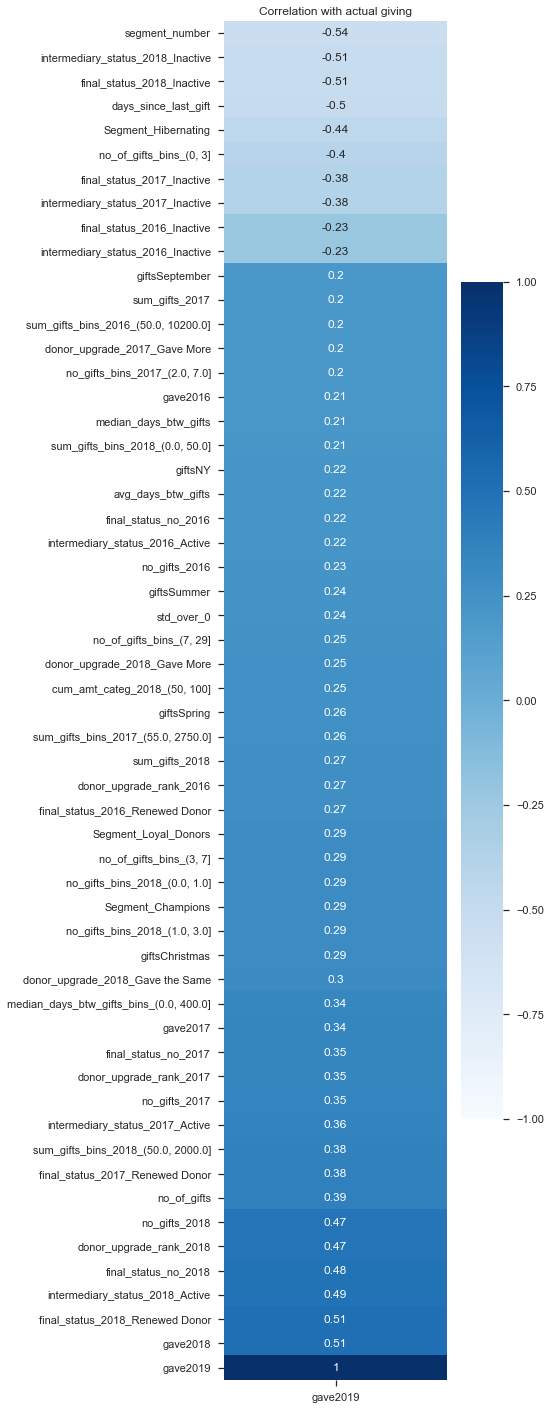

In [2613]:
# Correlation between variables and gave2019
sns.set(rc={"figure.figsize":(5, 25)}, style="ticks")
heatmap = sns.heatmap(df[vizCorrelationVariables].corr()[['gave2019']].sort_values(by='gave2019',ascending=True),vmin=-1,vmax=1,annot=True,cmap="Blues")
heatmap.set_title('Correlation with actual giving')
plt.show()

When we look at the correlation between variables, we see a lot of very high correlations, because the features share a lot of similarities.

We will need to keep only the ones that are highly correlated to 2019 and try to eliminate multicollinearity.

<AxesSubplot:>

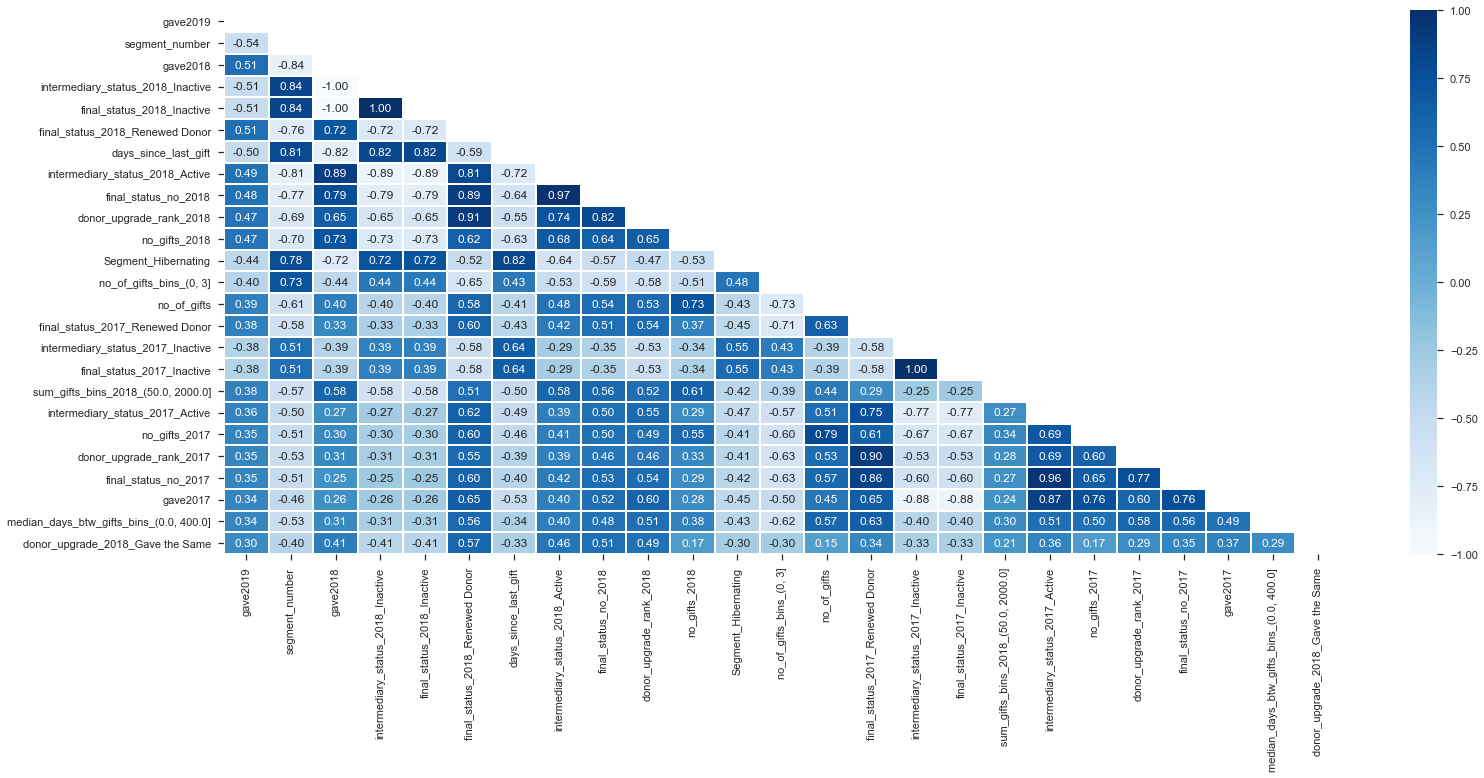

In [2614]:
# visualize only the features with an absolute correlation strength over 0.3
vizCorrelationVariables = corr_features[corr_features['gave2019'].abs()>0.3].index

# a correlation heatmap for all colums
sns.set(rc={"figure.figsize":(25, 10)}, style="ticks")
corr_matrix = df[vizCorrelationVariables].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(df[vizCorrelationVariables].corr(),annot=True,cmap="Blues",center=0, linewidths=1, fmt=".2f",mask=mask)

### Create a function that returns the top N features, based on chi square scores

In [2615]:
def topN(k):
    ''' a function that returns the top N features, as ordered by the chi-square test'''
    test      = SelectKBest(score_func=chi2, k=k)
    # we'll use the feature list in decending order of correlation
    chiScores = test.fit(X[corr_features_list], y) # Summarize scores
    np.set_printoptions(precision=3)
    
    scores = chiScores.scores_
    variables = corr_features_list
    chiResults = pd.DataFrame({'Feature': variables,'Score':scores})
    chiResults = chiResults.sort_values(by=['Score'],ascending=False)
    topN = chiResults.head(k)
    #print('\nThe list of top n features:')
    #print(topN)
    return topN


In [2616]:
top10 = topN(10)
top10

,Feature,Score
5,days_since_last_gift,345313.356513
58,total_gifts,92059.945006
32,sum_gifts_2018,74717.742725
81,days_since_first_gift,48468.871523
45,avg_days_btw_gifts,39325.174318
53,sum_gifts_2017,38794.151808
48,median_days_btw_gifts,36406.999653
89,sum_gifts_2016,8750.633043
104,gift_range,2956.640710
0,segment_number,2299.229525


In [2617]:
top30 = topN(30)
# create a list of features to use later for feature selection
topChi30 = top30['Feature'].values.tolist()

In [2618]:
topAll=topN(100)

In [2619]:
# # Split the scaled data.
# X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25, random_state=0)

### Forward Feature Selection <a class="anchor" id="corr"></a>

In [2620]:
# Scale the data
X_Scale = scaleData(X,MinMaxScaler())

In [2621]:
# Split the scaled data.
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25, random_state=0)

In [2622]:
from sklearn.feature_selection import f_regression


def select_features(X_train, y_train, X_test):
     # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
     # learn relationship from training data
    fs.fit(X_train, y_train)
     # transform train input data
    X_train_fs = fs.transform(X_train)
     # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

featuresDf = pd.DataFrame()
for i in range(0, len(X.columns)):
    featuresDf = featuresDf.append({"feature":X.columns[i],
                                    "ffs":round(fs.scores_[i],2)}, ignore_index=True)
featuresDf = featuresDf.sort_values(by=['ffs'],ascending=False)
print(featuresDf.head(40))
print('\nTop 40 features as a list: ')
print(np.array(featuresDf['feature'].head(40).values.tolist()))

ffsList = np.array(featuresDf['feature'].values.tolist())


# # what are scores for the features
# for i in range(len(fs.scores_)):
#  print(str(X.columns[i]) +": "+ str(round(fs.scores_[i],2)))


                                    feature      ffs
9                            segment_number  1108.66
25               final_status_2018_Inactive  1014.93
29                                 gave2018  1014.93
26        intermediary_status_2018_Inactive  1014.93
0                      days_since_last_gift   951.46
23          final_status_2018_Renewed Donor   943.63
28          intermediary_status_2018_Active   887.02
13                        cum_amt_rank_2018   869.80
16                     final_status_no_2018   851.41
14                  donor_upgrade_rank_2018   792.75
15                            no_gifts_2018   773.97
31                      Segment_Hibernating   645.07
58                  no_of_gifts_bins_(0, 3]   474.28
34       sum_gifts_bins_2018_(50.0, 2000.0]   461.22
37               final_status_2017_Inactive   438.61
38        intermediary_status_2017_Inactive   438.61
12                              no_of_gifts   434.57
35          final_status_2017_Renewed Donor   

### Backward Feature Elimination <a class="anchor" id="bfe"></a>

In [2623]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.feature_selection import RFE
# Create the object of the model
model = LogisticRegression(max_iter=400)

# Specify the number of  features to select
rfe = RFE(model, n_features_to_select=16)

# fit the model
rfe = rfe.fit(X_Scale, y)
#rfe = rfe.fit(X, y)

# Please uncomment the following lines to see the result
print('\n\nFEATURES SELECTED\n\n')
print(rfe.support_)




FEATURES SELECTED


[ True False False False False False  True False False False  True False
 False False False  True  True False False False False False False False
 False  True  True False False False  True False False False False False
 False False False False  True False False False  True False False False
 False False  True False False False False False  True  True False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True False False False False False False False
 False False False False]


In [2624]:
bfeFeatures = []
for i in range(0, len(X.keys())):
    if(rfe.support_[i]):
        print(X.keys()[i])
        bfeFeatures.append(X.keys()[i])

days_since_last_gift
median_days_btw_gifts
sum_gifts_2015
no_gifts_2018
final_status_no_2018
final_status_2018_Inactive
intermediary_status_2018_Inactive
giftsChristmas
donor_upgrade_2018_Gave the Same
giftsSpring
final_status_no_2016
no_gifts_bins_2018_(0.0, 1.0]
gave2017
no_gifts_bins_2017_(2.0, 7.0]
final_status_2017_Not yet acquired
intermediary_status_2017_Not yet acquired


### Random Forests Feature Selection <a class="anchor" id="rfselect"></a>

#### Random Forests Hyperparameter Tuning <a class="anchor" id="tune"></a>

In [2625]:
# Read in data and display first 5 rows
features = X

#print(features)

# Labels are the values we want to predict
labels = y

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels =\
    train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print("**************")
print("\nAccuracy:", metrics.accuracy_score(test_labels, predictions))
print('Recall: ',metrics.recall_score(test_labels, predictions))
print('Precision: ',metrics.precision_score(test_labels, predictions))
print('F1: ',metrics.f1_score(test_labels, predictions))
# cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
# print("\nConfusion Matrix")
# print(cm)

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,50,100,500,800,1000]

# Number of features to consider at every split
max_features = [3,5,7,9,11,14]

# Maximum number of levels in tree
max_depth = [2,4,6]
max_depth.append(None)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

{'bootstrap': [True, False],
 'max_depth': [1,3],
 'max_features': ['auto'],
 'n_estimators': [ 800, 1000]}

print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

print("Best parrameters")
print(rf_random.best_params_)


**************

Accuracy: 0.7546754675467546
Recall:  0.6626865671641791
Precision:  0.6686746987951807
F1:  0.6656671664167917
{'n_estimators': [10, 50, 100, 500, 800, 1000], 'max_features': [3, 5, 7, 9, 11, 14], 'max_depth': [2, 4, 6, None], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


Best parrameters
{'n_estimators': 10, 'max_features': 3, 'max_depth': 6, 'bootstrap': False}


In [2626]:
# Split data.

from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(
#         X, y, test_size=0.25)

from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc_x    = MinMaxScaler()
X_Scale = sc_x.fit_transform(X)

# Split data.
X_train, X_test, y_train, y_test = train_test_split(
    X_Scale, y, test_size=0.25)


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=10,max_features=11,max_depth=4,bootstrap=True)

#Train the model using the training sets y_pred=rf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test,y_pred))
print('Precision: ',metrics.precision_score(y_test,y_pred))
#print('F1: 'metrics.f1_score(y_test,predictions))

Accuracy: 0.7788778877887789
Recall:  0.7129909365558912
Precision:  0.6900584795321637


In [2627]:
# Find the top performing features
# Get numerical feature importances
feature_list = X.columns
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
print("**********************")
print("Ranking of feature importance:")
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

**********************
Ranking of feature importance:
Variable: sum_gifts_2018       Importance: 0.14
Variable: cum_amt_rank_2018    Importance: 0.14
Variable: final_status_no_2018 Importance: 0.14
Variable: segment_number       Importance: 0.09
Variable: final_status_2018_Renewed Donor Importance: 0.07
Variable: days_since_last_gift Importance: 0.05
Variable: median_days_btw_gifts Importance: 0.05
Variable: final_status_2017_Inactive Importance: 0.04
Variable: no_of_gifts_bins_(0, 3] Importance: 0.04
Variable: avg_days_btw_gifts   Importance: 0.02
Variable: gift_range           Importance: 0.02
Variable: gave2018             Importance: 0.02
Variable: days_since_first_gift Importance: 0.01
Variable: sum_gifts_2015       Importance: 0.01
Variable: no_of_gifts          Importance: 0.01
Variable: donor_upgrade_rank_2018 Importance: 0.01
Variable: cum_amt_rank_2017    Importance: 0.01
Variable: no_gifts_2017        Importance: 0.01
Variable: Segment_Hibernating  Importance: 0.01
Variable:

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [2628]:
rf_feature_list = []
for feature,score in feature_importances:
    if score>0:
        rf_feature_list.append(feature)
    
rf_feature_list

['sum_gifts_2018',
 'cum_amt_rank_2018',
 'final_status_no_2018',
 'segment_number',
 'final_status_2018_Renewed Donor',
 'days_since_last_gift',
 'median_days_btw_gifts',
 'final_status_2017_Inactive',
 'no_of_gifts_bins_(0, 3]',
 'avg_days_btw_gifts',
 'gift_range',
 'gave2018',
 'days_since_first_gift',
 'sum_gifts_2015',
 'no_of_gifts',
 'donor_upgrade_rank_2018',
 'cum_amt_rank_2017',
 'no_gifts_2017',
 'Segment_Hibernating',
 'intermediary_status_2017_Active',
 'cum_amt_categ_2018_(50, 100]',
 'gave2017',
 'final_status_2016_Renewed Donor',
 'cum_amt_categ_2018_(25, 50]']

### Take all the lists of best features and find the common elements <a class="anchor" id="bestlist"></a>

We'll make a lists of lists of features, including:
- features selected with Random Forests
- features selected with Backward Feature Elimination
- features selected with Forward Feature Selection
- a list of features with the highest correlation strength
- the top 30 features according to Chi Square test

Then we'll select only the features that appear on at least 3 lists and apply VIF to this final list to eliminate multicollinearity between them.

In [2629]:
lists_of_Features = [rf_feature_list,bfeFeatures,ffsList,vizCorrelationVariables,topChi30]

In [2630]:
# These are the common elements in all lists:
set(rf_feature_list).intersection(bfeFeatures,ffsList,vizCorrelationVariables,topChi30)

{'days_since_last_gift', 'final_status_no_2018'}

And now we'll see how many elements are repeted in 3 or 4 lists

In [2631]:
seen = set()
repeated_once = set()
repeated_twice = set()
repeated_three = set()
for l in lists_of_Features:
    for i in set(l):
        if i in repeated_twice:
            repeated_three.add(i)
        elif i in repeated_once:
            repeated_twice.add(i)
        elif i in seen:
            repeated_once.add(i)
        else:
            seen.add(i)

In [2632]:
# features that appear in 3 lists
repeated_twice

{'Segment_Hibernating',
 'avg_days_btw_gifts',
 'days_since_first_gift',
 'days_since_last_gift',
 'donor_upgrade_2018_Gave the Same',
 'donor_upgrade_rank_2017',
 'donor_upgrade_rank_2018',
 'final_status_2017_Inactive',
 'final_status_2018_Inactive',
 'final_status_2018_Renewed Donor',
 'final_status_no_2017',
 'final_status_no_2018',
 'gave2017',
 'gave2018',
 'gift_range',
 'giftsChristmas',
 'intermediary_status_2017_Active',
 'intermediary_status_2018_Active',
 'intermediary_status_2018_Inactive',
 'median_days_btw_gifts',
 'no_gifts_2017',
 'no_gifts_2018',
 'no_of_gifts',
 'no_of_gifts_bins_(0, 3]',
 'segment_number',
 'sum_gifts_2015',
 'sum_gifts_2018'}

In [2633]:
# features that appear in 4 lists
repeated_three

{'Segment_Hibernating',
 'days_since_last_gift',
 'donor_upgrade_rank_2018',
 'final_status_2018_Inactive',
 'final_status_2018_Renewed Donor',
 'final_status_no_2018',
 'gave2017',
 'gave2018',
 'intermediary_status_2018_Inactive',
 'median_days_btw_gifts',
 'no_gifts_2017',
 'no_gifts_2018',
 'no_of_gifts',
 'segment_number',
 'sum_gifts_2015'}

### Apply VIF to the elements that appear in at least 3 lists <a class="anchor" id="vif"></a>

##### VIF Factor components setup

In [2634]:
# # create a list in the reverse order of correlation strenght - weaker to stronger
# reverseCorr_features = df[correlationVariables].corr()[['gave2019']].sort_values(by='gave2019',ascending=True,key=abs)

# # assigned the list of features in the reverse order of strength of correlation with 'gave2019'
# vifFeatures = reverseCorr_features.index[1:]

# vifFeatures = vifFeatures.to_list()
# vifFeatures.remove('gave2019')

# X = X[vifFeatures]

In [2635]:
def calculate_vif_(X, thresh=5.0):
    '''a function that eliminates all the features with VIF > given threshold'''
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables[:-1]])
    afterVIF = X.columns[variables[:-1]]
    #/return X.iloc[:, variables[:-1]]
    return afterVIF

In [2636]:
afterVIF = calculate_vif_(X[repeated_twice], thresh=5.0)

C:\Users\Irina\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Irina\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


dropping 'intermediary_status_2018_Inactive' at index: 0
dropping 'gave2017' at index: 1
dropping 'intermediary_status_2018_Active' at index: 1
dropping 'final_status_2018_Inactive' at index: 8
dropping 'avg_days_btw_gifts' at index: 1
dropping 'intermediary_status_2017_Active' at index: 20
dropping 'final_status_2018_Renewed Donor' at index: 18
dropping 'gave2018' at index: 12
dropping 'no_of_gifts' at index: 6
dropping 'segment_number' at index: 13
dropping 'final_status_no_2018' at index: 15
dropping 'days_since_last_gift' at index: 9
Remaining variables:
Index(['no_of_gifts_bins_(0, 3]', 'sum_gifts_2018', 'gift_range',
       'median_days_btw_gifts', 'Segment_Hibernating', 'giftsChristmas',
       'donor_upgrade_rank_2017', 'final_status_2017_Inactive',
       'donor_upgrade_2018_Gave the Same', 'final_status_no_2017',
       'days_since_first_gift', 'sum_gifts_2015', 'no_gifts_2018',
       'donor_upgrade_rank_2018', 'no_gifts_2017'],
      dtype='object')


<AxesSubplot:>

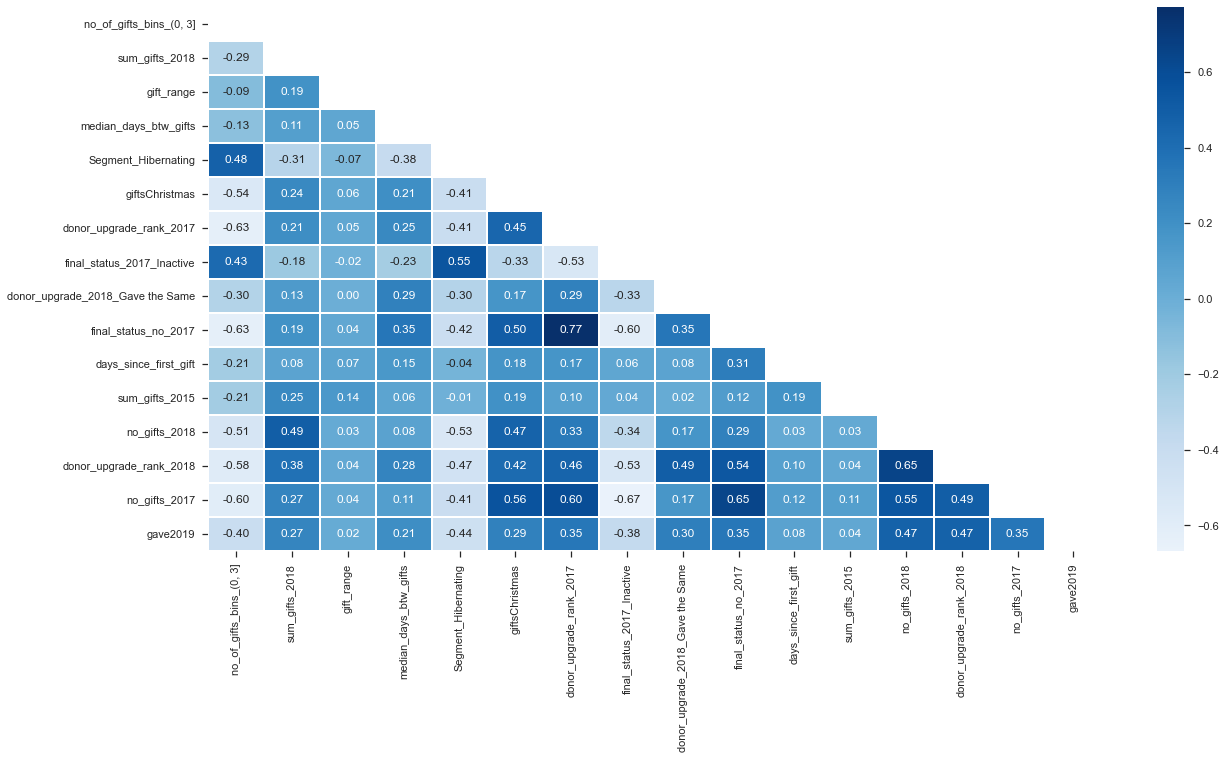

In [2637]:
# let's see the correlations between the remaining variables
afterVIFListViz = afterVIF.tolist()
afterVIFListViz.append('gave2019')

sns.set(rc={"figure.figsize":(20, 10)}, style="ticks")
corr_matrix = df[afterVIFListViz].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(df[afterVIFListViz].corr(),annot=True,cmap="Blues",center=0, linewidths=1, fmt=".2f",mask=mask)

### Manually selecting features for logistic regression, by looping through the list of features in descending order of correlation to 'gave2019' and selecting only the ones that increase accuracy <a class="anchor" id="manual"></a>

In [2638]:
def manualFeatureSelection(list):

    features_loop = []
    features_imp = []
    accuracyList = [0.0]
    recallList = []
    precisionList = []

    for feature in list:
        features_loop.append(feature)
        X_Scale_imp = X.copy()
        X_Scale_imp = X_Scale_imp[features_loop]

        # Split the data
        X_train_imp,X_test_imp,y_train_imp,y_test_imp  = train_test_split(
            X_Scale_imp, y, test_size=0.25, random_state=0)

        logisticModel = LogisticRegression(fit_intercept=True, solver='liblinear')
        logisticModel.fit(X_train_imp,y_train_imp)
        y_pred_imp=logisticModel.predict(X_test_imp)

        # calculate the metrics
        #cm = pd.crosstab(y_test_imp, y_pred_imp, rownames=['Actual'], colnames=['Predicted'])
        accuracy = metrics.accuracy_score(y_test_imp, y_pred_imp)
        #print(accuracy)
        recall = metrics.recall_score(y_test_imp, y_pred_imp)
        precision = metrics.precision_score(y_test_imp, y_pred_imp)
        previousAccuracy = accuracyList[-1]
        
        if accuracy > previousAccuracy:
            features_imp.append(str(feature))
           #print(features_imp)
            accuracyList.append(accuracy)
           #print(accuracyList)
            precisionList.append(precision)
            recallList.append(recall)                                 
        else:
            features_loop.pop()
    print("Best features:")
    print(features_imp)
    print("\nAccuracy: " + str(accuracyList[-1]))
    print("\nRecall: " + str(recallList[-1]))
    print("\nPrecision: " + str(precisionList[-1]))
    

In [2639]:
#X[features_imp].head()

In [2640]:
# run the function with the features selected from 3+ lists, after VIF
afterVIFList = afterVIF.tolist()
manualFeatureSelection(afterVIFList)

Best features:
['no_of_gifts_bins_(0, 3]', 'sum_gifts_2018', 'gift_range', 'giftsChristmas', 'donor_upgrade_rank_2017', 'sum_gifts_2015', 'no_gifts_2018']

Accuracy: 0.7898789878987899

Recall: 0.6220238095238095

Precision: 0.7655677655677655


In [2641]:
# run the function with all the features, sorted from highest to lowest correlation
manualFeatureSelection(corr_features.index[1:])

Best features:
['segment_number', 'final_status_2018_Renewed Donor', 'no_gifts_2018', 'Segment_Hibernating', 'final_status_2017_Renewed Donor', 'donor_upgrade_2018_Gave the Same', 'giftsChristmas', 'sum_gifts_bins_2018_(0.0, 50.0]']

Accuracy: 0.7964796479647965

Recall: 0.7142857142857143

Precision: 0.729483282674772


In [2642]:
topAllList = topAll['Feature'].tolist()

In [2643]:
# run the function with all the features, sorted from highest to lowest chi square
manualFeatureSelection(topAllList)

Best features:
['days_since_last_gift', 'total_gifts', 'days_since_first_gift', 'median_days_btw_gifts', 'segment_number', 'min_gift_amount', 'donor_upgrade_rank_2018', 'no_gifts_2018', 'final_status_no_2018', 'no_years_since_acq', 'final_status_2018_Renewed Donor', 'final_status_2018_Inactive']

Accuracy: 0.7909790979097909

Recall: 0.7619047619047619

Precision: 0.6994535519125683


In [2644]:
# run the function with features selected with FFS
manualFeatureSelection(ffsList)

Best features:
['segment_number', 'final_status_2018_Renewed Donor', 'no_gifts_2018', 'Segment_Hibernating', 'final_status_2017_Renewed Donor', 'donor_upgrade_2018_Gave the Same', 'no_gifts_bins_2018_(0.0, 1.0]', 'giftsChristmas', 'sum_gifts_2017', 'donor_upgrade_2018_Gave Less', 'intermediary_status_2018_New donor']

Accuracy: 0.7986798679867987

Recall: 0.7113095238095238

Precision: 0.7353846153846154


In [2645]:
manualFeatureSelection(bfeFeatures)

Best features:
['days_since_last_gift', 'median_days_btw_gifts', 'sum_gifts_2015', 'final_status_no_2018', 'donor_upgrade_2018_Gave the Same', 'final_status_no_2016', 'no_gifts_bins_2018_(0.0, 1.0]', 'gave2017', 'final_status_2017_Not yet acquired', 'intermediary_status_2017_Not yet acquired']

Accuracy: 0.7843784378437844

Recall: 0.7083333333333334

Precision: 0.7083333333333334


### Logistic regression <a class="anchor" id="logreg"></a>

Let's try to fit a simple logistic regression first.

In [2646]:
# Build logistic regression model and make predictions.
logisticModel = LogisticRegression(fit_intercept=True, solver='liblinear')
logisticModel.fit(X_train,y_train)
y_pred=logisticModel.predict(X_test)
#print(y_pred)

results = pd.DataFrame(
    {'Actual': y_test,
     'Predicted': y_pred
    })


In [2647]:
from   sklearn                 import metrics
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print('\nAccuracy: ',metrics.accuracy_score(y_test, y_pred))
print('Recall: ',metrics.recall_score(y_test_imp, y_pred_imp))
print('Precision: ',metrics.precision_score(y_test_imp, y_pred_imp))
print('F1: ',metrics.f1_score(y_test_imp, y_pred_imp))
print("\nConfusion Matrix")
print(cm)


Accuracy:  0.7634763476347635
Recall:  0.6753623188405797
Precision:  0.7213622291021672
F1:  0.6976047904191617

Confusion Matrix
Predicted    0    1
Actual             
0          470  108
1          107  224


In [2648]:
len(corr_features)

110

In [2649]:
def scaleSplit(X_imp,y):
    # scale the data
    sc_x    = MinMaxScaler() #MinMaxScaler led to the best results
    X_Scale_imp = sc_x.fit_transform(X_imp)

    # Split data - scaled
    X_train_imp,X_test_imp,y_train_imp,y_test_imp  = train_test_split(
        X_Scale_imp, y, test_size=0.25)
    return X_train_imp,X_test_imp,y_train_imp,y_test_imp

def fitLogReg(X_train_imp,y_train_imp,X_test_imp,i):  
    logisticModel = LogisticRegression(fit_intercept=True, solver='liblinear')
    logisticModel.fit(X_train_imp,y_train_imp)
    y_pred_imp=logisticModel.predict(X_test_imp)
    #model = logisticModel
    
    if i == 1:
        #Show model coefficients and intercept.
        print("\n*** Intercept: ")
        print(logisticModel.intercept_)

        print("\n*** Model Coefficients: ")
        print(logisticModel.coef_)
    
    return y_pred_imp

def evaluateLogReg(y_test_imp, y_pred_imp):
#     cm = pd.crosstab(y_test_imp, y_pred_imp, rownames=['Actual'], colnames=['Predicted'])
#     print('\nAccuracy: ',metrics.accuracy_score(y_test_imp, y_pred_imp))
#     print('Recall: ',metrics.recall_score(y_test_imp, y_pred_imp))
#     print('Precision: ',metrics.precision_score(y_test_imp, y_pred_imp))
#     print('F1: ',metrics.f1_score(y_test_imp, y_pred_imp))
#     print("\nConfusion Matrix")
#     print(cm)

    precision = round(metrics.precision_score(y_test_imp, y_pred_imp),2)
    recall    = round(metrics.recall_score(y_test_imp, y_pred_imp), 2)
    f1        = round(metrics.f1_score(y_test_imp, y_pred_imp), 2)
    accuracy  = round(metrics.accuracy_score(y_test_imp, y_pred_imp), 2)
    
    accuracyList.append(accuracy)
    precisionList.append(precision)
    recallList.append(recall)
    f1List.append(f1)
    
def showStats(y,X_imp):
    
    logit_model=sm.Logit(y,X_imp)
    result=logit_model.fit()
    print(result.summary())
    
def rocCurve(model,X_test,y_test):    
    y_prob = model.predict_proba(X_test)
    from sklearn.metrics           import roc_curve
    from sklearn.metrics           import roc_auc_score

    auc = roc_auc_score(y_test, y_prob[:, 1],)
    print('Logistic: ROC AUC=%.3f' % (auc))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob[:, 1])
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    plt.plot([0,1], [0,1], '--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
def showAvg():
    print("Average accuracy: " + str(round(np.mean(accuracyList),2)))
    print("Average S.D of accuracy: " + str(round(np.std(accuracyList),2)))

    print("Average precision: " + str(round(np.mean(precisionList),2)))
    print("Average S.D of precision: " + str(round(np.std(precisionList),2)))

    print("Average recall: " + str(round(np.mean(recallList),2)))
    print("Average S.D of recall: " + str(round(np.std(recallList),2)))

    print("Average F1: " + str(round(np.mean(f1List),2)))
    print("Average S.D of F1: " + str(round(np.std(f1List),2)))
    
    
def runModel(i,X_imp,y):   

#     accuracyList=[]
#     precisionList=[]
#     recallList=[]
#     f1List=[]

    X_train_imp,X_test_imp,y_train_imp,y_test_imp = scaleSplit(X_imp,y)
    y_pred_imp = fitLogReg(X_train_imp,y_train_imp,X_test_imp,i)
    evaluateLogReg(y_test_imp, y_pred_imp)
    if i==1:
        showStats(y,X_imp)
    #print(accuracyList)

In [2650]:
# based on features common in 3+ lists, after VIF was applied
# also took out the features with large p-values after running the model
X_imp = X[[#'sum_gifts_2018', 'median_days_btw_gifts', 'Segment_Hibernating',
       'giftsChristmas', 
       #'final_status_2017_Not yet acquired',
       'donor_upgrade_rank_2017', 
       #'donor_upgrade_2018_Gave the Same',
       'days_since_last_gift', 'days_since_first_gift', 'no_gifts_2018',
       'donor_upgrade_rank_2018', 
       #'sum_gifts_2017',
       #'intermediary_status_2017_Active', 
       'no_gifts_2017']]

for i in range(1,10):
    runModel(i,X_imp,y)
showAvg()


*** Intercept: 
[-0.371]

*** Model Coefficients: 
[[-1.075  0.76  -4.032  0.399  2.292  0.958  0.532]]
Optimization terminated successfully.
         Current function value: 0.465493
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3626
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2900
Time:                        10:11:29   Log-Likelihood:                -1691.1
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                2.482e-295
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [2651]:
# features based on chi square

X_imp = X[['days_since_last_gift', 
           #'total_gifts', 
           'days_since_first_gift', 
           #'median_days_btw_gifts', 
           'segment_number', 
           #'min_gift_amount', 
           #'donor_upgrade_rank_2018', 
           'no_gifts_2018', 'final_status_no_2018', 
           'no_years_since_acq', 'final_status_2018_Renewed Donor', 
           #'intermediary_status_2018_Inactive'
          ]]

for i in range(1,10):
    runModel(i,X_imp,y)
showAvg()


*** Intercept: 
[-0.026]

*** Model Coefficients: 
[[-3.3   -0.472 -0.547  2.078 -0.674  1.095  1.327]]
Optimization terminated successfully.
         Current function value: 0.460359
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3626
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2978
Time:                        10:11:31   Log-Likelihood:                -1672.5
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                2.078e-303
                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [2652]:
# based on features selected with ffs
X_imp = X[['segment_number', 'final_status_2018_Renewed Donor', 'no_gifts_2018', 
           'Segment_Hibernating', 
          'final_status_2017_Renewed Donor', 
           #'donor_upgrade_2018_Gave the Same', 
           #'no_gifts_bins_2018_(0.0, 1.0]', 
          'giftsChristmas', 
           #'sum_gifts_2017', 'donor_upgrade_2018_Gave Less', 
           'intermediary_status_2018_New donor']]

for i in range(1,5):
    runModel(i,X_imp,y)
showAvg()

# X_train_imp,X_test_imp,y_train_imp,y_test_imp = scaleSplit(X_imp,y)
# y_pred_imp = fitLogReg(X_train_imp,y_train_imp,X_test_imp)
# evaluateLogReg(y_test_imp, y_pred_imp)
# showStats(y,X_imp)
# #rocCurve(model,X_test_imp,y_test_imp)


*** Intercept: 
[-0.494]

*** Model Coefficients: 
[[-1.153  0.898  2.63  -0.839  0.468 -0.828  0.629]]
Optimization terminated successfully.
         Current function value: 0.471703
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3626
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2805
Time:                        10:11:33   Log-Likelihood:                -1713.7
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                1.463e-285
                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

In [2653]:
# based on features with highest correlation strenght to gave2019

X_imp = X[['segment_number', 'final_status_2018_Renewed Donor', 
           'no_gifts_2018', 'Segment_Hibernating', 'final_status_2017_Renewed Donor', 
           'donor_upgrade_2018_Gave the Same', 
           'giftsChristmas', 'sum_gifts_bins_2018_(0.0, 50.0]']]

for i in range(1,5):
    runModel(i,X_imp,y)
showAvg()


*** Intercept: 
[-0.481]

*** Model Coefficients: 
[[-1.078  0.622  3.493 -1.033  0.472  0.376 -0.542 -0.06 ]]
Optimization terminated successfully.
         Current function value: 0.470609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2822
Time:                        10:11:35   Log-Likelihood:                -1709.7
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                4.336e-286
                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

In [2654]:
# based on features that worked for stacked logistic regression
X_imp = X[['days_since_last_gift',
'median_days_btw_gifts_bins_(0.0, 400.0]',
'no_of_gifts',
#'no_gifts_2018',
'no_years_since_acq',
'final_status_2018_Renewed Donor',
'no_gifts_2016',
'no_years_since_acq_bins_(10, 24]',
'final_status_2017_Not yet acquired',
]]
for i in range(1,10):
    runModel(i,X_imp,y)
showAvg()



*** Intercept: 
[-0.775]

*** Model Coefficients: 
[[-3.678  0.486  1.9    0.99   0.849  0.262 -0.237  0.839]]
Optimization terminated successfully.
         Current function value: 0.463726
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3625
Method:                           MLE   Df Model:                            7
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2927
Time:                        10:11:37   Log-Likelihood:                -1684.7
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                6.553e-297
                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

In [2655]:
# based on RF features - older version
X_imp = X[['final_status_no_2018', 
           #'donor_upgrade_rank_2016',  
           'no_gifts_2018', 
           'no_gifts_2017', 
           #'sum_gifts_2017', 
           'final_status_2018_New Donor', 
           #'sum_gifts_2015',
            'days_since_last_gift']]

for i in range(1,10):
    runModel(i,X_imp,y)
showAvg()


*** Intercept: 
[-1.134]

*** Model Coefficients: 
[[ 1.325  1.822  1.957  0.834 -2.872]]
Optimization terminated successfully.
         Current function value: 0.475293
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3628
Method:                           MLE   Df Model:                            4
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2750
Time:                        10:11:39   Log-Likelihood:                -1726.7
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                1.977e-282
                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------

In [2656]:
#based on RF features
X_imp = X[['intermediary_status_2018_Inactive',
 'days_since_last_gift',
 'segment_number',
 'final_status_2018_Renewed Donor',
 'final_status_no_2018',
 'Segment_Hibernating',
 'intermediary_status_2017_Active',
 'median_days_btw_gifts',
 'cum_amt_rank_2017',
 'sum_gifts_2018',
 'no_of_gifts_bins_(3, 7]',]]

for i in range(1,10):
    runModel(i,X_imp,y)
showAvg()


*** Intercept: 
[0.282]

*** Model Coefficients: 
[[-0.805 -2.392 -0.741  0.603 -0.422 -0.032  0.582  0.096  0.222  0.951
  -0.051]]
Optimization terminated successfully.
         Current function value: 0.467038
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               gave2019   No. Observations:                 3633
Model:                          Logit   Df Residuals:                     3622
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.2876
Time:                        10:11:41   Log-Likelihood:                -1696.7
converged:                       True   LL-Null:                       -2381.9
Covariance Type:            nonrobust   LLR p-value:                2.629e-288
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

## Stacking Models <a class="anchor" id="stacking"></a>

In [2657]:
def getUnfitModels():
    models = list()
    models.append(LogisticRegression(max_iter=1000))
    models.append(DecisionTreeClassifier())
    models.append(ExtraTreesClassifier())
    models.append(AdaBoostClassifier())
    models.append(RidgeClassifier(max_iter=500))
    #models.append(XGBClassifier())
    models.append(RandomForestClassifier(n_estimators=10,max_features=9,max_depth=4,bootstrap=True))
    return models

accuracyList=[]
precisionList=[]
recallList=[]
f1List=[]

def evaluateModel(y_test, predictions, model,stacked="yes"):
    precision = round(precision_score(y_test, predictions),2)
    recall    = round(recall_score(y_test, predictions), 2)
    f1        = round(f1_score(y_test, predictions), 2)
    accuracy  = round(accuracy_score(y_test, predictions), 2)
    
    if stacked == "yes":
        accuracyList.append(accuracy)
        precisionList.append(precision)
        recallList.append(recall)
        f1List.append(f1)

#     print("Precision:" + str(precision) + " Recall:" + str(recall) +\
#           " F1:" + str(f1) + " Accuracy:" + str(accuracy) +\
#           "   " + model.__class__.__name__)
    
#     cm = pd.crosstab(y_test, predictions,
#                      rownames=['Actual'],
#                      colnames=['Predicted'])
#     print(cm)

def fitBaseModels(X_train, y_train, X_test, models):
    dfPredictions = pd.DataFrame()

    # Fit base model and store its predictions in dataframe.
    for i in range(0, len(models)):
        models[i].fit(X_train, y_train)
        predictions = models[i].predict(X_test)
        colName = str(i)
        dfPredictions[colName] = predictions
    return dfPredictions, models

def fitStackedModel(X, y):
    model = LogisticRegression()
    #model = RandomForestClassifier(n_estimators=10,max_features=5,max_depth=4,bootstrap=True)
    model.fit(X, y)
    return model

X_imp = X[['days_since_last_gift',
'median_days_btw_gifts_bins_(0.0, 400.0]',
'no_of_gifts',
'no_gifts_2018',
'no_years_since_acq',
'final_status_2018_Renewed Donor',
'no_gifts_2016',
'no_years_since_acq_bins_(10, 24]',
'final_status_2017_Not yet acquired',
]]

for i in range(1,50):
    # Split data into train, test and validation sets.
    X_train, X_temp, y_train, y_temp = train_test_split(X_imp, y, test_size=0.70)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.50)

    # Get base models.
    unfitModels = getUnfitModels()

    # Fit base and stacked models.
    dfPredictions, models = fitBaseModels(X_train, y_train, X_test, unfitModels)
    stackedModel          = fitStackedModel(dfPredictions, y_test)

    # Evaluate base models with validation data.
#     print("\n** Evaluate Base Models **")
    dfValidationPredictions = pd.DataFrame()
    for i in range(0, len(models)):
        predictions = models[i].predict(X_val)
        colName = str(i)
        dfValidationPredictions[colName] = predictions
        evaluateModel(y_val, predictions, models[i],stacked="no")

    # Evaluate stacked model with validation data.
    stackedPredictions = stackedModel.predict(dfValidationPredictions)
#     print("\n** Evaluate Stacked Model **")
    evaluateModel(y_val, stackedPredictions, stackedModel,stacked="yes")
    
    if i == 49:
        rocCurve(stackedModel,X_test,y_val)

print("Average accuracy: " + str(np.mean(accuracyList)))
print("Average S.D of accuracy: " + str(np.std(accuracyList)))

print("Average precision: " + str(np.mean(precisionList)))
print("Average S.D of precision: " + str(np.std(precisionList)))

print("Average recall: " + str(np.mean(recallList)))
print("Average S.D of recall: " + str(np.std(recallList)))

print("Average F1: " + str(np.mean(f1List)))
print("Average S.D of F1: " + str(np.std(f1List)))

print("Average auc: " + str(round(np.mean(aucList),2)))
print("Average S.D of auc: " + str(round(np.std(aucList),2)))



Average accuracy: 0.7787755102040818
Average S.D of accuracy: 0.00848351415952104
Average precision: 0.7016326530612246
Average S.D of precision: 0.021698014465309393
Average recall: 0.68
Average S.D of recall: 0.024159335036125353
Average F1: 0.6902040816326531
Average S.D of F1: 0.014355514608219539
Average auc: 0.85
Average S.D of auc: 0.01


## Bagging <a class="anchor" id="bagging"></a>

In [2658]:
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import RidgeClassifier
from sklearn.svm             import SVC

# Create classifiers
rf          = RandomForestClassifier(n_estimators=10,max_features=10,max_depth=4,bootstrap=True)
et          = ExtraTreesClassifier()
knn         = KNeighborsClassifier()
svc         = SVC()
rg          = RidgeClassifier()
ab         = AdaBoostClassifier()
lr         = LogisticRegression(max_iter=1000) 

# Build array of classifiers.
classifierArray   = [rf, et, knn, svc, rg,ab,lr]

# X_imp = X[[#'min_gift_amount', 
#            'median_days_btw_gifts_bins_(0.0, 400.0]', 
#         #'std',
#        #'no_of_gifts_bins_(0, 3]', 
#       #'sum_gifts_2018', 
#        #'sum_gifts_2016',
#        'final_status_no_2016', 
#       # 'median_days_btw_gifts', 
#        #'sum_gifts_2014',
#        #'donor_upgrade_rank_2017', 
#        'final_status_2017_Inactive',
#        #'final_status_no_2017', 
#        # 'donor_upgrade_rank_2016', 
#         'gave2018',
#        #'sum_gifts_2015', 
#        'days_since_first_gift', 
#        'no_gifts_2018',
#       #'donor_upgrade_rank_2018', 
#        #'sum_gifts_2017',
#       # 'sum_gifts_bins_2018_(50.0, 2000.0]', 
#     'days_since_last_gift'
#         #'no_gifts_2017'
   
#      ]]   # this is it

# X_imp = X[['days_since_last_gift', 
#            #'no_gifts_2018', 
#            #'no_gifts_2017', 
#            'median_days_btw_gifts_bins_(0.0, 400.0]',
#           'final_status_2018_Renewed Donor',
#           # 'final_status_2017_Renewed Donor',
#           'no_gifts_bins_2018_(3.0, 9.0]',
#           'no_of_gifts_bins_(7, 29]',
#           #'no_gifts_bins_2017_(2.0, 7.0]'
#           # 'no_years_since_acq_bins_(10, 24]'
#           ]]


X_imp = X[['days_since_last_gift',
'total_gifts',
#'avg_days_btw_gifts',
'median_days_btw_gifts_bins_(0.0, 400.0]',
#'sum_gifts_2015',
#'min_gift_amount',
'no_of_gifts',
#'cum_amt_rank_2018',
'no_gifts_2018',
#'final_status_no_2018',
#'mean_gift',
#'cum_amt_rank_2017',
'no_years_since_acq',
'final_status_2018_Renewed Donor',
'no_gifts_2017',
'final_status_2017_Renewed Donor',
'donor_upgrade_2018_Gave the Same',
'no_gifts_2016',
'cum_amt_categ_2018_(50, 100]',
#'no_gifts_bins_2018_(3.0, 9.0]',
'cum_amt_categ_2018_(250, 1000]',
#'cum_amt_categ_2017_(100, 250]',
'no_years_since_acq_bins_(10, 24]',
#'donor_upgrade_2016_Gave Less',
'final_status_2017_Not yet acquired',
]]


def showStats(classifier, scores):
    print(classifier + ":    ", end="")
    strMean = str(round(scores.mean(),2))

    strStd  = str(round(scores.std(),2))
    print("Mean: "  + strMean + "   ", end="")
    print("Std: " + strStd)

from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.30)

def evaluateModel(model, X_test, y_test, title):
    print("\n*** " + title + " ***")
    predictions = model.predict(X_test)
    accuracy    = metrics.accuracy_score(y_test, predictions)
    recall      = metrics.recall_score(y_test, predictions)
    precision   = metrics.precision_score(y_test, predictions)
    f1          = metrics.f1_score(y_test, predictions)

    print("Accuracy:  " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall:    " + str(recall))
    print("F1:        " + str(f1))

# Search for the best classifier.
for clf in classifierArray:
    modelType = clf.__class__.__name__

    # Create and evaluate stand-alone model.
    clfModel    = clf.fit(X_train, y_train)
    evaluateModel(clfModel, X_test, y_test, modelType)

    # max_features means the maximum number of features to draw from X.
    # max_samples sets the percentage of available data used for fitting.
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=11,
                                    n_estimators=9)
    baggedModel = bagging_clf.fit(X_train, y_train)
    evaluateModel(baggedModel, X_test, y_test, "Bagged: " + modelType)
    #showStats(clf, scores)



*** RandomForestClassifier ***
Accuracy:  0.7651376146788991
Precision: 0.6741293532338308
Recall:    0.6843434343434344
F1:        0.6791979949874687

*** Bagged: RandomForestClassifier ***
Accuracy:  0.7642201834862385
Precision: 0.6643026004728132
Recall:    0.7095959595959596
F1:        0.6862026862026862

*** ExtraTreesClassifier ***
Accuracy:  0.7431192660550459
Precision: 0.6421568627450981
Recall:    0.6616161616161617
F1:        0.6517412935323383

*** Bagged: ExtraTreesClassifier ***
Accuracy:  0.7614678899082569
Precision: 0.6691542288557214
Recall:    0.6792929292929293
F1:        0.6741854636591478

*** KNeighborsClassifier ***
Accuracy:  0.7211009174311926
Precision: 0.616751269035533
Recall:    0.6136363636363636
F1:        0.6151898734177216

*** Bagged: KNeighborsClassifier ***
Accuracy:  0.7486238532110092
Precision: 0.6596858638743456
Recall:    0.6363636363636364
F1:        0.6478149100257069

*** SVC ***
Accuracy:  0.7486238532110092
Precision: 0.6405529953917051


Looking at the models above, it seems that Random Forests, Ridge Regression and AdaBoost seem to perform better than other models, so we'll explore this further.

### Ridge Regression with all features <a class="anchor" id="ridge"></a>

In [2659]:
sc_x = MinMaxScaler()
X_Scale = sc_x.fit_transform(X)
# Split the scaled data.
X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25, random_state=0)

# Perform Ridge regression.
print("\nRidge Regression")
from sklearn.linear_model import  RidgeClassifier
ridge_reg   = RidgeClassifier().fit(X_train, y_train)
#ridge_reg.fit
predictions = ridge_reg.predict(X_test)
print(ridge_reg.score(X_train, y_train))

accuracy    = metrics.accuracy_score(y_test, predictions)
recall      = metrics.recall_score(y_test, predictions)
precision   = metrics.precision_score(y_test, predictions)
f1          = metrics.f1_score(y_test, predictions)

print("Accuracy:  " + str(accuracy))
print("Precision: " + str(precision))
print("Recall:    " + str(recall))
print("F1:        " + str(f1))

print(ridge_reg.get_params())
print(ridge_reg.coef_)
print(ridge_reg.n_features_in_)


Ridge Regression
0.7878120411160059
Accuracy:  0.7854785478547854
Precision: 0.7155963302752294
Recall:    0.6964285714285714
F1:        0.7058823529411765
{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
[[-0.854  0.017  0.214 -0.047  0.267 -0.058 -0.181 -0.066 -0.044  0.57
   0.173 -0.266  0.014 -0.188  0.124  0.654  0.139 -0.03  -0.253 -0.125
   0.359 -0.127  0.435  0.218 -0.339 -0.001 -0.001  0.195  0.113  0.001
  -0.527 -0.26  -0.125  0.118 -0.021  0.183  0.09   0.005  0.005 -0.17
   0.203 -0.464  0.47   0.008  0.337 -0.305  0.385  0.099 -0.185 -0.056
   0.2   -0.123  0.037 -0.025  0.068  0.195 -0.141  0.107  0.018  0.09
   0.19  -0.057  0.161 -0.062 -0.037  0.04  -0.069 -0.069  0.022 -0.099
   0.022  0.111  0.027  0.025 -0.064 -0.246  0.134 -0.187 -0.003  0.245
   0.253  0.006 -0.146  0.271 -0.261 -0.052  0.08  -0.149  0.044 -0.064
   0.016 -0.066 -0.12  -0.121 

In [2660]:
XColList = X.columns.tolist()
XColList = pd.DataFrame(XColList)

In [2661]:
#XColList.to_csv(r'C:\Users\Irina\Documents\BCIT classes\COMP 4254 - Advanced data analytics\Assignment 2\Xcolumns.csv')

In [2662]:
# tried the features that resulted after lists combinations and VIF
X_imp = X[['sum_gifts_2018',
 'median_days_btw_gifts',
 'Segment_Hibernating',
 'giftsChristmas',
 'final_status_2017_Not yet acquired',
 'donor_upgrade_rank_2017',
 'donor_upgrade_2018_Gave the Same',
 'days_since_last_gift',
 'days_since_first_gift',
 'no_gifts_2018',
 'donor_upgrade_rank_2018',
 'sum_gifts_2017',
 'intermediary_status_2017_Active',
 'no_gifts_2017']]

### Functions for building and evaluating individual models <a class="anchor" id="functions"></a>

In [2663]:
accuracyList=[]
precisionList=[]
recallList=[]
f1List=[]
aucList = []

def evaluateModel(model, X_test, y_test):
   
    predictions = model.predict(X_test)
    accuracy    = metrics.accuracy_score(y_test, predictions)
    recall      = metrics.recall_score(y_test, predictions)
    precision   = metrics.precision_score(y_test, predictions)
    f1          = metrics.f1_score(y_test, predictions)

#     print("Accuracy:  " + str(accuracy))
#     print("Precision: " + str(precision))
#     print("Recall:    " + str(recall))
#     print("F1:        " + str(f1))

    accuracyList.append(accuracy)
    precisionList.append(precision)
    recallList.append(recall)
    f1List.append(f1)
    
def rocCurve(model,X_test,y_test):    
    y_prob = model.predict_proba(X_test)
    from sklearn.metrics           import roc_curve
    from sklearn.metrics           import roc_auc_score

    auc = roc_auc_score(y_test, y_prob[:, 1],)
    print('ROC AUC=%.3f' % (auc))
    
    aucList.append(auc)

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob[:, 1])
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    plt.plot([0,1], [0,1], '--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    
def showAvgResults():
    print("Average accuracy: " + str(round(np.mean(accuracyList),2)))
    print("Average S.D of accuracy: " + str(round(np.std(accuracyList),2)))

    print("Average precision: " + str(round(np.mean(precisionList),2)))
    print("Average S.D of precision: " + str(round(np.std(precisionList),2)))

    print("Average recall: " + str(round(np.mean(recallList),2)))
    print("Average S.D of recall: " + str(round(np.std(recallList),2)))

    print("Average F1: " + str(round(np.mean(f1List),2)))
    print("Average S.D of F1: " + str(round(np.std(f1List),2)))
    
    print("Average auc: " + str(round(np.mean(aucList),2)))
    print("Average S.D of auc: " + str(round(np.std(aucList),2)))
    

### (Bagged) Logistic Regression over 50 runs with ROC <a class="anchor" id="baggedlog"></a>

ROC AUC=0.850


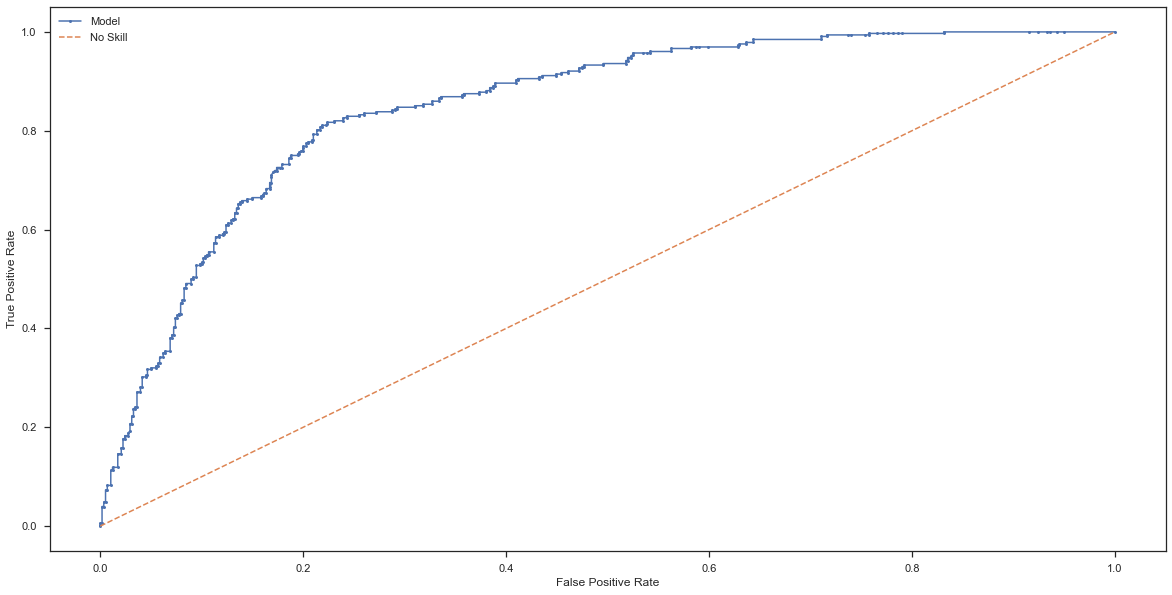

Logistic Regression:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.68
Average S.D of recall: 0.03
Average F1: 0.69
Average S.D of F1: 0.02
Average auc: 0.85
Average S.D of auc: 0.0
**************
Bagged Logistic Regression:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.68
Average S.D of recall: 0.02
Average F1: 0.69
Average S.D of F1: 0.01
Average auc: 0.85
Average S.D of auc: 0.0


In [2664]:
  X_imp = X[[#'min_gift_amount', 
           'median_days_btw_gifts_bins_(0.0, 400.0]', 
        #'std',
       #'no_of_gifts_bins_(0, 3]', 
      #'sum_gifts_2018', 
       #'sum_gifts_2016',
       'final_status_no_2016', 
      # 'median_days_btw_gifts', 
       #'sum_gifts_2014',
       #'donor_upgrade_rank_2017', 
       'final_status_2017_Inactive',
       #'final_status_no_2017', 
       # 'donor_upgrade_rank_2016', 
        'gave2018',
       #'sum_gifts_2015', 
       'days_since_first_gift', 
       'no_gifts_2018',
      #'donor_upgrade_rank_2018', 
       #'sum_gifts_2017',
      # 'sum_gifts_bins_2018_(50.0, 2000.0]', 
    'days_since_last_gift'
        #'no_gifts_2017'

]]

# X_imp = X[['days_since_last_gift', 
#            #'no_gifts_2018', 
#            #'no_gifts_2017', 
#            'median_days_btw_gifts_bins_(0.0, 400.0]',
#           'final_status_2018_Renewed Donor',
#           # 'final_status_2017_Renewed Donor',
#           'no_gifts_bins_2018_(3.0, 9.0]',
#           'no_of_gifts_bins_(7, 29]',
#           #'no_gifts_bins_2017_(2.0, 7.0]'
#           # 'no_years_since_acq_bins_(10, 24]'
#           ]]


# X_imp = X[['days_since_last_gift',
# 'total_gifts',
# #'avg_days_btw_gifts',
# 'median_days_btw_gifts_bins_(0.0, 400.0]',
# #'sum_gifts_2015',
# #'min_gift_amount',
# 'no_of_gifts',
# #'cum_amt_rank_2018',
# 'no_gifts_2018',
# #'final_status_no_2018',
# #'mean_gift',
# #'cum_amt_rank_2017',
# 'no_years_since_acq',
# 'final_status_2018_Renewed Donor',
# 'no_gifts_2017',
# 'final_status_2017_Renewed Donor',
# 'donor_upgrade_2018_Gave the Same',
# 'no_gifts_2016',
# 'cum_amt_categ_2018_(50, 100]',
# #'no_gifts_bins_2018_(3.0, 9.0]',
# 'cum_amt_categ_2018_(250, 1000]',
# #'cum_amt_categ_2017_(100, 250]',
# 'no_years_since_acq_bins_(10, 24]',
# #'donor_upgrade_2016_Gave Less',
# 'final_status_2017_Not yet acquired',
# ]]

for i in range(1,50):
    sc_x = MinMaxScaler()
    X_Scale = sc_x.fit_transform(X_imp)
    # Split the scaled data.
    X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25)

    log_reg   = LogisticRegression().fit(X_train, y_train)
    #ridge_reg.fit
    predictions = log_reg .predict(X_test)
    #print(log_reg .score(X_train, y_train))
    evaluateModel(log_reg,X_test,y_test)
    if i==49:
        rocCurve(log_reg,X_test,y_test) 
print('Logistic Regression:')
showAvgResults()


# the results for bagged Logistic Regression are worse than simple logistic regression
for i in range(1,50):    
    bagging_clf = BaggingClassifier(log_reg, max_samples=0.4, max_features=7,n_estimators=9)
    baggedModel = bagging_clf.fit(X_train, y_train)
    evaluateModel(baggedModel, X_test, y_test)
print('**************')    
print('Bagged Logistic Regression:')
showAvgResults()
    

### Ridge regression over 50 runs - simple and bagged <a class="anchor" id="baggedridge"></a>

In [2665]:
# selected only the features that had a coefficient >0.2
# after re-running it, took out the ones with the lowest coefficient
X_imp = X[['days_since_last_gift',
'total_gifts',
#'avg_days_btw_gifts',
'median_days_btw_gifts_bins_(0.0, 400.0]',
#'sum_gifts_2015',
#'min_gift_amount',
'no_of_gifts',
#'cum_amt_rank_2018',
'no_gifts_2018',
#'final_status_no_2018',
#'mean_gift',
#'cum_amt_rank_2017',
'no_years_since_acq',
'final_status_2018_Renewed Donor',
'no_gifts_2017',
'final_status_2017_Renewed Donor',
'donor_upgrade_2018_Gave the Same',
'no_gifts_2016',
'cum_amt_categ_2018_(50, 100]',
#'no_gifts_bins_2018_(3.0, 9.0]',
'cum_amt_categ_2018_(250, 1000]',
#'cum_amt_categ_2017_(100, 250]',
'no_years_since_acq_bins_(10, 24]',
#'donor_upgrade_2016_Gave Less',
'final_status_2017_Not yet acquired',
]]

# selected only the features that had a coefficient >0.2
# after re-running it, took out the ones with the lowest coefficient
X_imp = X[['days_since_last_gift',
#'total_gifts',
'median_days_btw_gifts_bins_(0.0, 400.0]',
#'no_of_gifts',
'no_gifts_2018',
'no_years_since_acq',
'final_status_2018_Renewed Donor',
'no_gifts_2017',
'final_status_2017_Renewed Donor',
#'donor_upgrade_2018_Gave the Same',
#'no_gifts_2016',
'cum_amt_categ_2018_(50, 100]',
'cum_amt_categ_2018_(250, 1000]',
#'no_years_since_acq_bins_(10, 24]',
#'final_status_2017_Not yet acquired',
]]

for i in range(1,50):
    sc_x = MinMaxScaler()
    X_Scale = sc_x.fit_transform(X_imp)
    # Split the scaled data.
    X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25)

    ridge_reg   = RidgeClassifier().fit(X_train, y_train)
    #ridge_reg.fit
    predictions = ridge_reg .predict(X_test)
    #print(log_reg .score(X_train, y_train))
    evaluateModel(ridge_reg,X_test,y_test)
#     if i==49:
#         rocCurve(ridge_reg,X_test,y_test) 

print('Ridge Regression:')
showAvgResults()

# the results for bagged Ridge Regression are worse than simple ridge regression
for i in range(1,50):    
    bagging_clf = BaggingClassifier(ridge_reg, max_samples=0.4, max_features=9,n_estimators=9)
    baggedModel = bagging_clf.fit(X_train, y_train)
    evaluateModel(baggedModel, X_test, y_test)

print('**************')     
print('Bagged Ridge Regression:')
showAvgResults()

print(ridge_reg.get_params())
print(ridge_reg.coef_)
print(ridge_reg.n_features_in_)


Ridge Regression:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.68
Average S.D of recall: 0.02
Average F1: 0.69
Average S.D of F1: 0.01
Average auc: 0.85
Average S.D of auc: 0.0
**************
Bagged Ridge Regression:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.69
Average S.D of recall: 0.03
Average F1: 0.69
Average S.D of F1: 0.01
Average auc: 0.85
Average S.D of auc: 0.0
{'alpha': 1.0, 'class_weight': None, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
[[-0.817  0.104  1.34   0.112  0.402 -0.364  0.166  0.117  0.152]]
9


### AdaBoost Classfier over 50 runs simple and bagged <a class="anchor" id="adaboost"></a>

ROC AUC=0.844


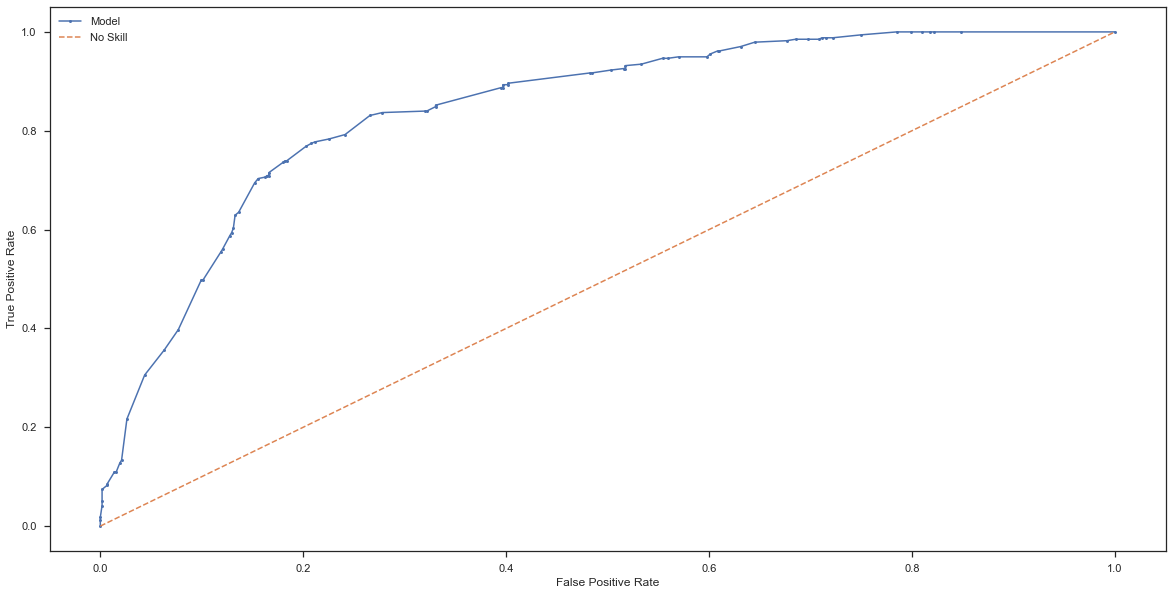

AdaBoost Classifier:
Average accuracy: 0.77
Average S.D of accuracy: 0.01
Average precision: 0.68
Average S.D of precision: 0.03
Average recall: 0.7
Average S.D of recall: 0.03
Average F1: 0.69
Average S.D of F1: 0.02
Average auc: 0.85
Average S.D of auc: 0.0
AdaBoost Classifier:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.7
Average S.D of recall: 0.02
Average F1: 0.7
Average S.D of F1: 0.02
Average auc: 0.85
Average S.D of auc: 0.0


In [2666]:
X_imp = X[['days_since_last_gift', 
           #'no_gifts_2018', 
           #'no_gifts_2017', 
           'median_days_btw_gifts_bins_(0.0, 400.0]',
          'final_status_2018_Renewed Donor',
          # 'final_status_2017_Renewed Donor',
          'no_gifts_bins_2018_(3.0, 9.0]',
          'no_of_gifts_bins_(7, 29]',
          #'no_gifts_bins_2017_(2.0, 7.0]'
          # 'no_years_since_acq_bins_(10, 24]'
          ]]

accuracyList=[]
precisionList=[]
recallList=[]
f1List=[]

for i in range(1,50):
    sc_x = MinMaxScaler()
    X_Scale = sc_x.fit_transform(X_imp)
    # Split the scaled data.
    X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25)

    adaboost   = AdaBoostClassifier().fit(X_train, y_train)
    #ridge_reg.fit
    predictions = adaboost.predict(X_test)
    #print(log_reg .score(X_train, y_train))
    evaluateModel(adaboost,X_test,y_test)
    if i==49:
        rocCurve(adaboost,X_test,y_test) 
print('AdaBoost Classifier:')
showAvgResults()


for i in range(1,50):    
    bagging_clf = BaggingClassifier(adaboost, max_samples=0.4, max_features=5,n_estimators=9)
    baggedModel = bagging_clf.fit(X_train, y_train)
    evaluateModel(baggedModel, X_test, y_test)
print('AdaBoost Classifier:')
showAvgResults()
    

### Random Forests over 50 runs - simple and bagged <a class="anchor" id="adaboost"></a>

In [2667]:
rf_feature_list = []
for feature,score in feature_importances:
    if score>0.01:
        rf_feature_list.append(feature)
    
rf_feature_list

['sum_gifts_2018',
 'cum_amt_rank_2018',
 'final_status_no_2018',
 'segment_number',
 'final_status_2018_Renewed Donor',
 'days_since_last_gift',
 'median_days_btw_gifts',
 'final_status_2017_Inactive',
 'no_of_gifts_bins_(0, 3]',
 'avg_days_btw_gifts',
 'gift_range',
 'gave2018']

<AxesSubplot:>

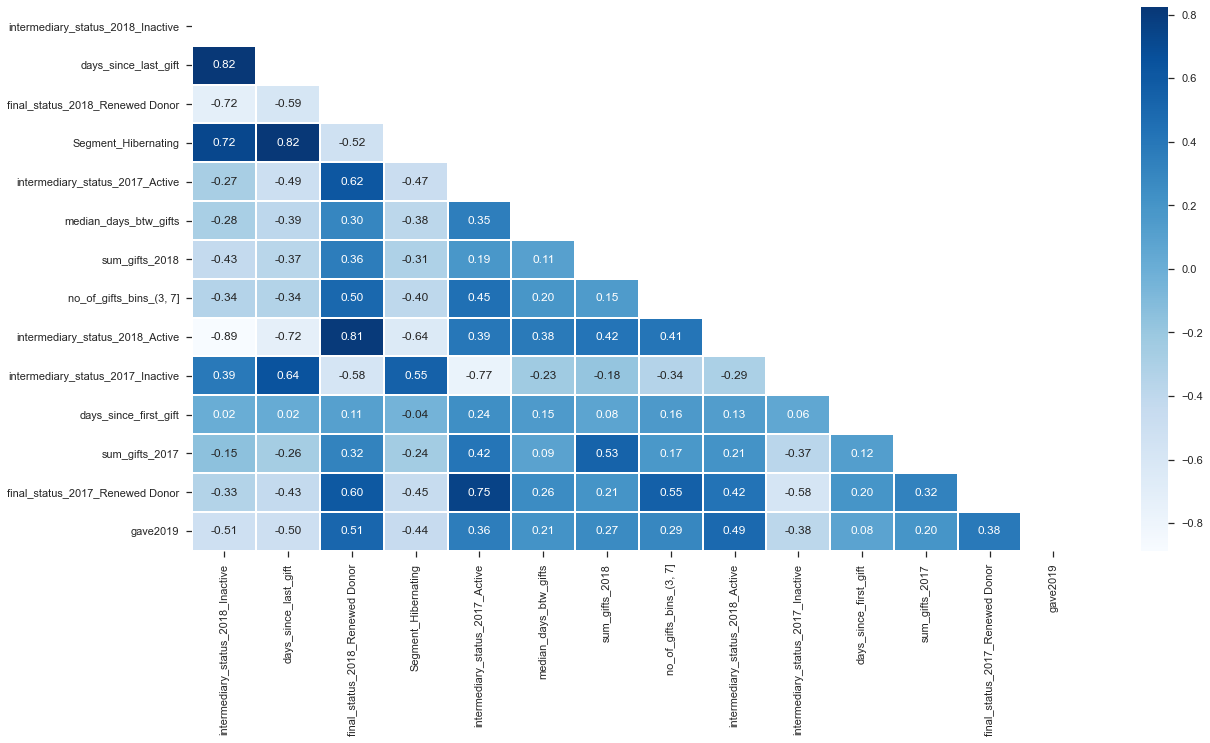

In [2668]:
# check the correlations between the most important featuers
rfCorrelation = ['intermediary_status_2018_Inactive',
 'days_since_last_gift',
 #'segment_number',
 'final_status_2018_Renewed Donor',
 #'final_status_no_2018',
 'Segment_Hibernating',
 'intermediary_status_2017_Active',
 'median_days_btw_gifts',
 'cum_amt_rank_2017',
 'sum_gifts_2018',
 'no_of_gifts_bins_(3, 7]',
 'intermediary_status_2018_Active',
 'intermediary_status_2017_Inactive',
 'days_since_first_gift',
 #'avg_days_btw_gifts',
 'sum_gifts_2017',
 #'donor_upgrade_rank_2018',
 #'final_status_2018_Inactive',
 'final_status_2017_Renewed Donor',
 'cum_amt_rank_2016',
 #'no_years_since_acq_2015',
 #'Segment_At_Risk',
 #'final_status_2017_Not yet acquired'
                ]
rfCorrelation.append('gave2019')

sns.set(rc={"figure.figsize":(20, 10)}, style="ticks")
corr_matrix = df[rfCorrelation].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(df[rfCorrelation].corr(),annot=True,cmap="Blues",center=0, linewidths=1, fmt=".2f",mask=mask)


ROC AUC=0.856


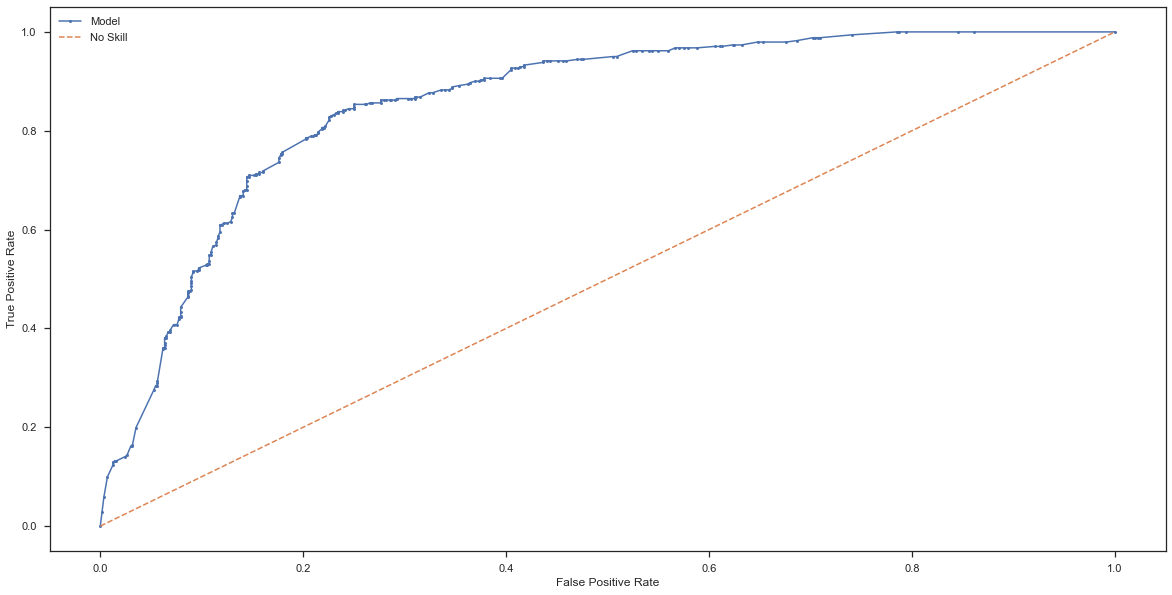

Random Forests Classifier:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.02
Average recall: 0.7
Average S.D of recall: 0.02
Average F1: 0.7
Average S.D of F1: 0.02
Average auc: 0.85
Average S.D of auc: 0.01
**********************
Bagged Random Forests Classifier:
Average accuracy: 0.78
Average S.D of accuracy: 0.01
Average precision: 0.7
Average S.D of precision: 0.03
Average recall: 0.71
Average S.D of recall: 0.02
Average F1: 0.71
Average S.D of F1: 0.02
Average auc: 0.85
Average S.D of auc: 0.01


In [2669]:
#rf score > 0.01
important_indices = [
 'intermediary_status_2018_Inactive',
 'days_since_last_gift',
 'segment_number',
 'final_status_2018_Renewed Donor',
# 'final_status_no_2018',
# 'Segment_Hibernating',
 'intermediary_status_2017_Active',
 'median_days_btw_gifts',
 'cum_amt_rank_2017',
# 'sum_gifts_2018',
 'no_of_gifts_bins_(3, 7]',
]

for i in range(1,50):
    sc_x = MinMaxScaler()
    X_imp = X[important_indices]
    X_Scale = sc_x.fit_transform(X_imp)
    # Split the scaled data.
    X_train, X_test, y_train, y_test = train_test_split(X_Scale, y, test_size=0.25)

    rf_imp = RandomForestClassifier(n_estimators=10,max_features=8,max_depth=4,bootstrap=True).fit(X_train, y_train)
    #ridge_reg.fit
    predictions = rf_imp.predict(X_test)
    #print(log_reg .score(X_train, y_train))
    evaluateModel(rf_imp,X_test,y_test)
    if i==49:
        rocCurve(rf_imp,X_test,y_test) 
print('Random Forests Classifier:')
showAvgResults()


for i in range(1,50):    
    bagging_clf = RandomForestClassifier(n_estimators=10,max_features=8,max_depth=4,bootstrap=True)
    baggedModel = bagging_clf.fit(X_train, y_train)
    evaluateModel(baggedModel, X_test, y_test)
print("**********************")    
print('Bagged Random Forests Classifier:')
showAvgResults()
